# Разведывательный анализ чистых данных

### 1 Загрузка данных и подключение библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA

from sklearn.metrics import pairwise_distances
import scipy

In [2]:
import warnings
warnings.filterwarnings('ignore')

Константы

In [3]:
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))

In [4]:
GROUP_CLEAN = 'ПР'

Загружаем справочники

In [5]:
DOCS_DOMAIN_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'domain.xlsx')
DOCS_PHYLUM_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'phylum.xlsx')
DOCS_CLASS_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'class.xlsx')
DOCS_ORDER_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'order.xlsx')
DOCS_FAMILY_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'family.xlsx')
DOCS_SPECIES_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'species.xlsx')

DOCS_FULL_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'full.xlsx')

In [6]:
df_domain = pd.read_excel(DOCS_DOMAIN_PATH)
df_phylum = pd.read_excel(DOCS_PHYLUM_PATH)
df_class = pd.read_excel(DOCS_CLASS_PATH)
df_order = pd.read_excel(DOCS_ORDER_PATH)
df_family = pd.read_excel(DOCS_FAMILY_PATH)
df_species = pd.read_excel(DOCS_SPECIES_PATH)

df_docs = pd.read_excel(DOCS_FULL_PATH)

In [7]:
df_docs.head()

,id_species,species,id_family,family,id_order,order,id_class,class,id_phylum,phylum,id_domain,domain
0,1,Arthrobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
1,2,Galactobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
2,3,Corynebacterium,2,Corynebacteriaceae,2,Mycobacteriales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
3,4,Adlercreutzia,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria
4,5,Gordonibacter,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria


Загружаем данные для анализа

In [8]:
DATA_CLEAN_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data.xlsx')
DATA_CLEAN_UNWRAP_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data_unwrap.xlsx')

In [9]:
df_clean = pd.read_excel(DATA_CLEAN_PATH)
df_clean_unwrap = pd.read_excel(DATA_CLEAN_UNWRAP_PATH)

In [10]:
df_clean.head()

,group,number,Arthrobacter,Galactobacter,Corynebacterium,Adlercreutzia,Gordonibacter,Paraeggerthella,Rubneribacter,Slackia,...,Turicimonas,Vampirovibrio,Enterobacter,Escherichia/Shigella,Klebsiella,unclassified_Enterobacteriaceae,Acinetobacter,Stenotrophomonas,unclassified_Bacteria,unclassified_Dothideomycetes
0,ПР,1,0,0,0,5,0,0,77,0,...,3,23,487,0,5,0,3,3,3,0
1,ПР,2,0,0,5,10,0,0,95,3,...,0,8,100,0,0,0,0,3,4,0
2,ПДР,1,0,0,3,0,0,0,22,0,...,0,0,56,6,0,0,0,4,0,0
3,ПДР,2,10,0,0,0,0,0,23,0,...,9,21,316,11,5,0,0,26,3,0
4,Целлюлоза,1,0,4,3,0,0,0,19,0,...,8,0,323,8,6,0,0,0,0,0


In [11]:
df_clean_unwrap.head()

,group,number,id_species,colonies
0,ПР,1,1,0
1,ПР,1,2,0
2,ПР,1,3,0
3,ПР,1,4,5
4,ПР,1,5,0


In [12]:
df_species.head()

,id,id_family,name
0,1,1,Arthrobacter
1,2,1,Galactobacter
2,3,2,Corynebacterium
3,4,3,Adlercreutzia
4,5,3,Gordonibacter


Соединяем по всем справочникам

In [13]:
df_clean_unwrap_docs = df_clean_unwrap.merge(df_docs, on=['id_species'], how='left')
df_clean_unwrap_docs.head()

,group,number,id_species,colonies,species,id_family,family,id_order,order,id_class,class,id_phylum,phylum,id_domain,domain
0,ПР,1,1,0,Arthrobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
1,ПР,1,2,0,Galactobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
2,ПР,1,3,0,Corynebacterium,2,Corynebacteriaceae,2,Mycobacteriales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
3,ПР,1,4,5,Adlercreutzia,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria
4,ПР,1,5,0,Gordonibacter,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria


### 2 Анализ макро-характеристик

Ссылка на [цвета](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py) для отрисовки

Посмотрим какие признакми можно убрать из анализа где количество колони равно 0

In [14]:
df_clean.sum(axis=0)[lambda x: x == 0]

Paraeggerthella                       0
Sarcina                               0
Clostridium sensu stricto             0
Clostridium XlVa                      0
Faecalimonas                          0
Terrisporobacter                      0
unclassified_Peptostreptococcaceae    0
Turicibacter                          0
dtype: object

Запомним строки чтобы в дальнейшем исключить их из анализа

In [15]:
ZEROS_FEATURES = list(df_clean.groupby(by=['group']).mean().sum(axis=0)[lambda x: x == 0].index)
ZEROS_FEATURES

['Paraeggerthella',
 'Sarcina',
 'Clostridium sensu stricto',
 'Clostridium XlVa',
 'Faecalimonas',
 'Terrisporobacter',
 'unclassified_Peptostreptococcaceae',
 'Turicibacter']

#### 2.1 График среднего числа колоний по группам

In [16]:
df_clean

,group,number,Arthrobacter,Galactobacter,Corynebacterium,Adlercreutzia,Gordonibacter,Paraeggerthella,Rubneribacter,Slackia,...,Turicimonas,Vampirovibrio,Enterobacter,Escherichia/Shigella,Klebsiella,unclassified_Enterobacteriaceae,Acinetobacter,Stenotrophomonas,unclassified_Bacteria,unclassified_Dothideomycetes
0,ПР,1,0,0,0,5,0,0,77,0,...,3,23,487,0,5,0,3,3,3,0
1,ПР,2,0,0,5,10,0,0,95,3,...,0,8,100,0,0,0,0,3,4,0
2,ПДР,1,0,0,3,0,0,0,22,0,...,0,0,56,6,0,0,0,4,0,0
3,ПДР,2,10,0,0,0,0,0,23,0,...,9,21,316,11,5,0,0,26,3,0
4,Целлюлоза,1,0,4,3,0,0,0,19,0,...,8,0,323,8,6,0,0,0,0,0
5,Целлюлоза,2,0,0,0,0,0,0,73,0,...,0,15,77,11,0,0,0,0,3,3
6,Лакт,1,0,0,0,11,4,0,146,0,...,0,0,350,5,12,0,0,0,0,0
7,Лакт,2,0,0,0,0,0,0,98,5,...,8,31,35,0,3,0,0,0,12,0
8,Энтеросгель,1,0,0,0,8,6,0,128,0,...,3,8,47,0,0,0,0,0,0,0
9,Энтеросгель,2,0,0,3,16,33,0,238,23,...,5,188,331,12,8,0,0,32,21,0


group
Fe             23412.0
АУ             25420.0
Биф            23120.5
Лакт           27565.0
Медь           27549.0
ПДР            21102.0
ПР             25726.5
Спор           26073.5
Хит            23049.5
Целлюлоза      19473.5
Энтеросгель    27207.0
dtype: float64


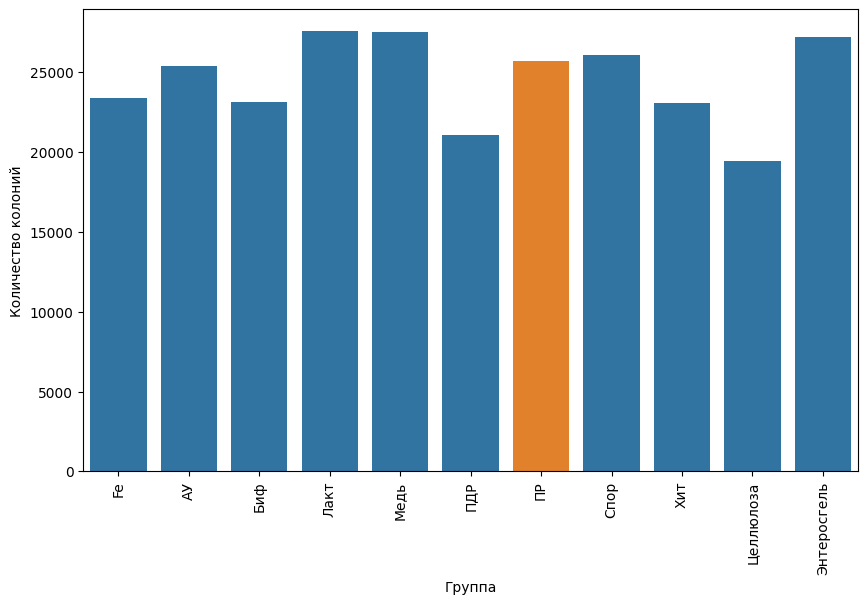

In [17]:
def plot_mean_sum_colonies_by_groups():
    group_counts = df_clean.drop(columns=['number']).groupby(by=['group']).mean().sum(axis=1)
    print(group_counts)
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in group_counts.index]
    ax.set_xlabel('Группа')
    ax.set_ylabel('Количество колоний')
    ax.tick_params(axis='x', labelrotation=90)
    sns.barplot(y=group_counts.values, x=group_counts.index, ax=ax, palette=colors)
    None
plot_mean_sum_colonies_by_groups()

#### 2.2 Диаграмма размаха числа колоний по группам

          group    sum
15           Fe  17465
14           Fe  29359
10           АУ  21489
11           АУ  29351
17          Биф  30437
16          Биф  15804
6          Лакт  27277
7          Лакт  27853
13         Медь  27625
12         Медь  27473
2           ПДР  22663
3           ПДР  19541
0            ПР  17833
1            ПР  33620
18         Спор  23756
19         Спор  28391
20          Хит  21915
21          Хит  24184
5     Целлюлоза  21318
4     Целлюлоза  17629
9   Энтеросгель  31371
8   Энтеросгель  23043


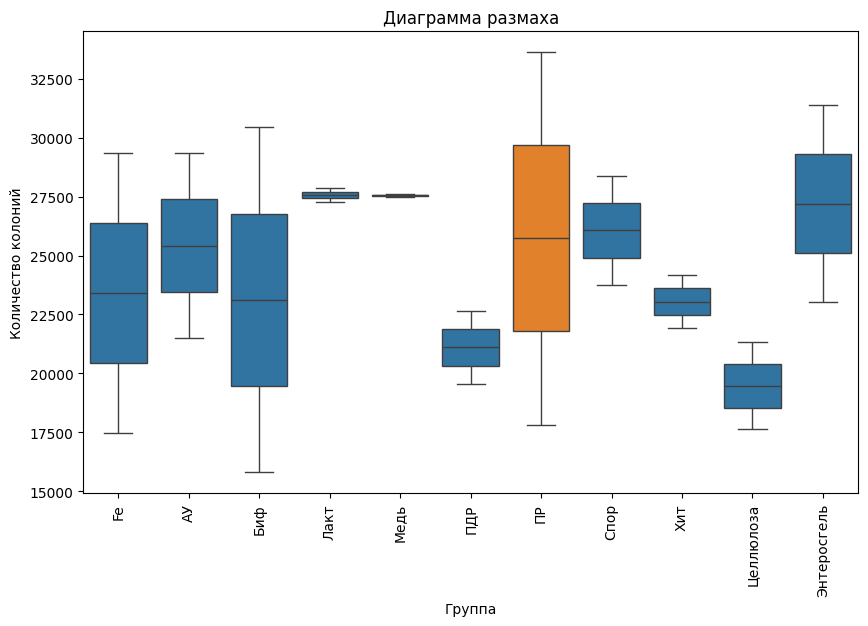

In [18]:
def plot_all_sum_colonies_by_groups():
    group_counts = df_clean[['group']]
    group_counts['sum'] = df_clean.drop(columns=['number']).sum(axis=1, numeric_only=True)
    group_counts = group_counts.sort_values(by=['group'])
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('Группа')
    ax.set_ylabel('Количество колоний')
    colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in group_counts.group.unique()]
    ax.tick_params(axis='x', labelrotation=90)
    print(group_counts)
    sns.boxplot(data=group_counts, x='group', y='sum', ax=ax, palette=colors)
    plt.title("Диаграмма размаха")
plot_all_sum_colonies_by_groups()

#### 2.3 Анализ по категориям групп бактерий

##### 2.3.1 Домены

In [19]:
pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['domain'], aggfunc='sum').reset_index()

domain,group,number,Bacteria,Fungi
0,Fe,1,29359,0
1,Fe,2,17465,0
2,АУ,1,21489,0
3,АУ,2,29351,0
4,Биф,1,15804,0
5,Биф,2,30437,0
6,Лакт,1,27277,0
7,Лакт,2,27853,0
8,Медь,1,27473,0
9,Медь,2,27625,0


`Fungi` есть только для **Целлюлоза-2**, в целом по `Bacteria` будет совпадать с диаграммой размаха

##### 2.3.2 Филум

In [20]:
pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['phylum'], aggfunc='sum').reset_index()


phylum,group,number,Actinobacteria,Ascomycota,Bacteroidetes,Firmicutes,Proteobacteria,unclassified_Bacteria
0,Fe,1,21,0,18199,11000,134,5
1,Fe,2,17,0,7786,9317,340,5
2,АУ,1,13,0,11661,9784,31,0
3,АУ,2,28,0,19938,9172,213,0
4,Биф,1,26,0,6811,8434,533,0
5,Биф,2,83,0,15797,13692,858,7
6,Лакт,1,161,0,17777,8972,367,0
7,Лакт,2,103,0,16562,11099,77,12
8,Медь,1,59,0,19231,6615,1564,4
9,Медь,2,54,0,18686,8533,348,4


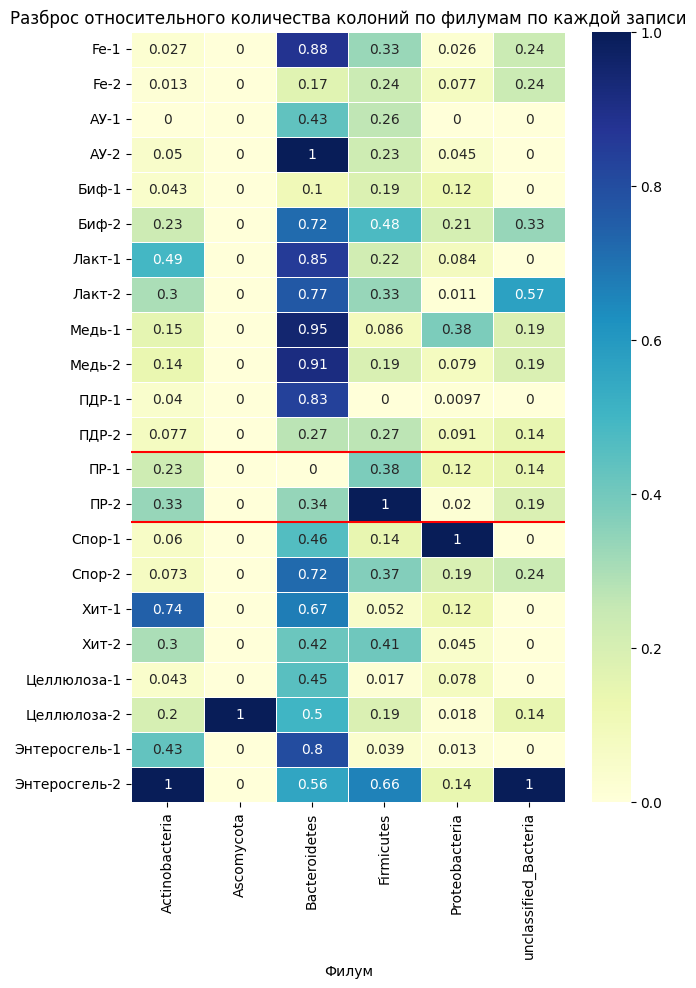

In [21]:
def plot_heatmap_colonies_by_phylum():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['phylum'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['group', 'number'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter)
    y_labels = table['group'] + '-' + table['number'].astype('str')
   
    x_labels = list(table_filter.columns)
    fig, ax = plt.subplots(figsize=(7, 10))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidths=0.5)
    axes.set_xlabel('Филум')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
    # Ищем ПР в лейблах
    index_target = list(table['group']).index(GROUP_CLEAN)
    if index_target != -1:
        axes.axhline(y=index_target, linewidth=1.5, color="red")
        axes.axhline(y=index_target+2, linewidth=1.5, color="red")
    plt.title("Разброс относительного количества колоний по филумам по каждой записи")
plot_heatmap_colonies_by_phylum()

Посмотрим на доли

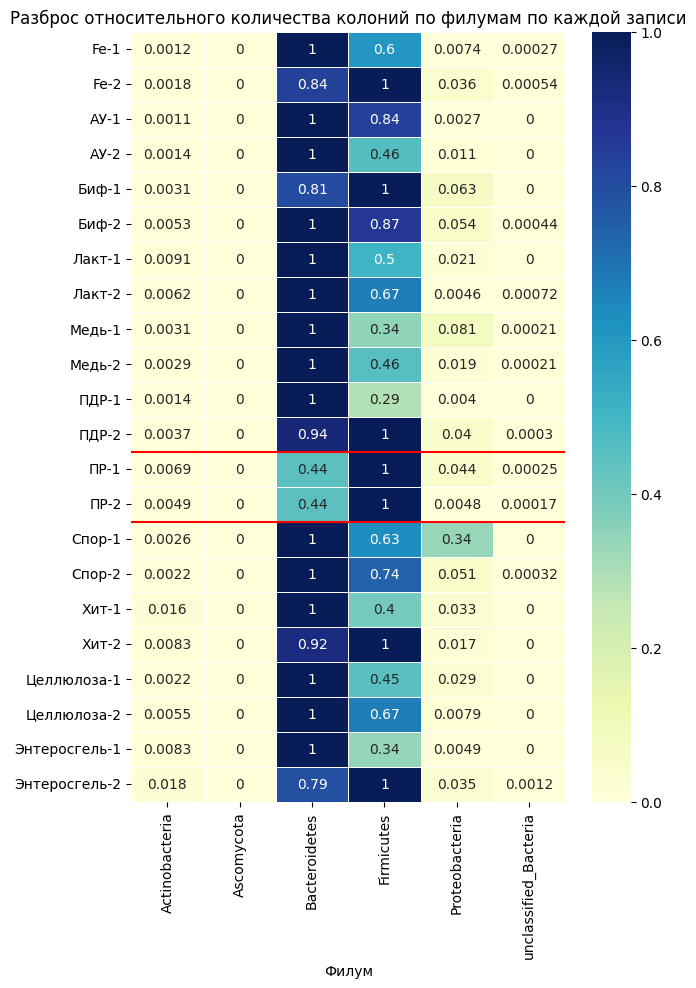

In [22]:
def plot_heatmap_colonies_by_phylum_frac():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['phylum'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['group', 'number'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter.T).T
    y_labels = table['group'] + '-' + table['number'].astype('str')
   
    x_labels = list(table_filter.columns)
    fig, ax = plt.subplots(figsize=(7, 10))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidths=0.5)
    axes.set_xlabel('Филум')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
    # Ищем ПР в лейблах
    index_target = list(table['group']).index(GROUP_CLEAN)
    if index_target != -1:
        axes.axhline(y=index_target, linewidth=1.5, color="red")
        axes.axhline(y=index_target+2, linewidth=1.5, color="red")
    plt.title("Разброс относительного количества колоний по филумам по каждой записи")
plot_heatmap_colonies_by_phylum_frac()

##### 2.3.3 Класс

In [23]:
pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['phylum','class'] , aggfunc='sum').reset_index()

phylum        group number Actinobacteria                     Ascomycota  \
class                      Actinobacteria Coriobacteriia Dothideomycetes   
0                Fe      1              0             21               0   
1                Fe      2              5             12               0   
2                АУ      1              5              8               0   
3                АУ      2             10             18               0   
4               Биф      1              5             21               0   
5               Биф      2             15             68               0   
6              Лакт      1              0            161               0   
7              Лакт      2              0            103               0   
8              Медь      1             14             45               0   
9              Медь      2              9             45               0   
10              ПДР      1              3             22               0   
11              ПДР      2             10             26               0   
12               ПР      1              0             82               0   
13               ПР      2              5            108               0   
14             Спор      1              6             25               0   
15             Спор      2              4             31               0   
16              Хит      1              0            236               0   
17              Хит      2              0            103               0   
18        Целлюлоза      1              7             19               0   
19        Целлюлоза      2              0             73               3   
20      Энтеросгель      1              0            142               0   
21      Энтеросгель      2              3            310               0   

phylum Bacteroidetes Firmicutes                              \
class    Bacteroidia    Bacilli Clostridia Erysipelotrichia   
0              18199       5228       5279              404   
1               7786       2350       6840              107   
2              11661       1314       8451                8   
3              19938       2013       6872              254   
4               6811       5669       2662               82   
5              15797       5090       8440               84   
6              17777       1743       7067               92   
7              16562       2889       7849              299   
8              19231       1759       4654               52   
9              18686       3947       4485               60   
10             17516        997       3807              214   
11              9243       4491       5332               32   
12              5295       6461       5321               51   
13             10265      20759       2166               68   
14             12068       4131       3366               87   
15             15830       4264       7051              282   
16             15173        969       4924               66   
17             11407       3697       8385              339   
18             11894       1785       3334              241   
19             12665       2880       5518               49   
20             17062       1752       3882               92   
21             13460       2417      14295              151   

phylum                              Proteobacteria                     \
class  unclassified_Firmicutes Alphaproteobacteria Betaproteobacteria   
0                           89                   3                  8   
1                           20                   0                  4   
2                           11                   0                  0   
3                           33                   8                 35   
4                           21                   3                  0   
5                           78                  62                203   
6                           70                   0                  0   
7    

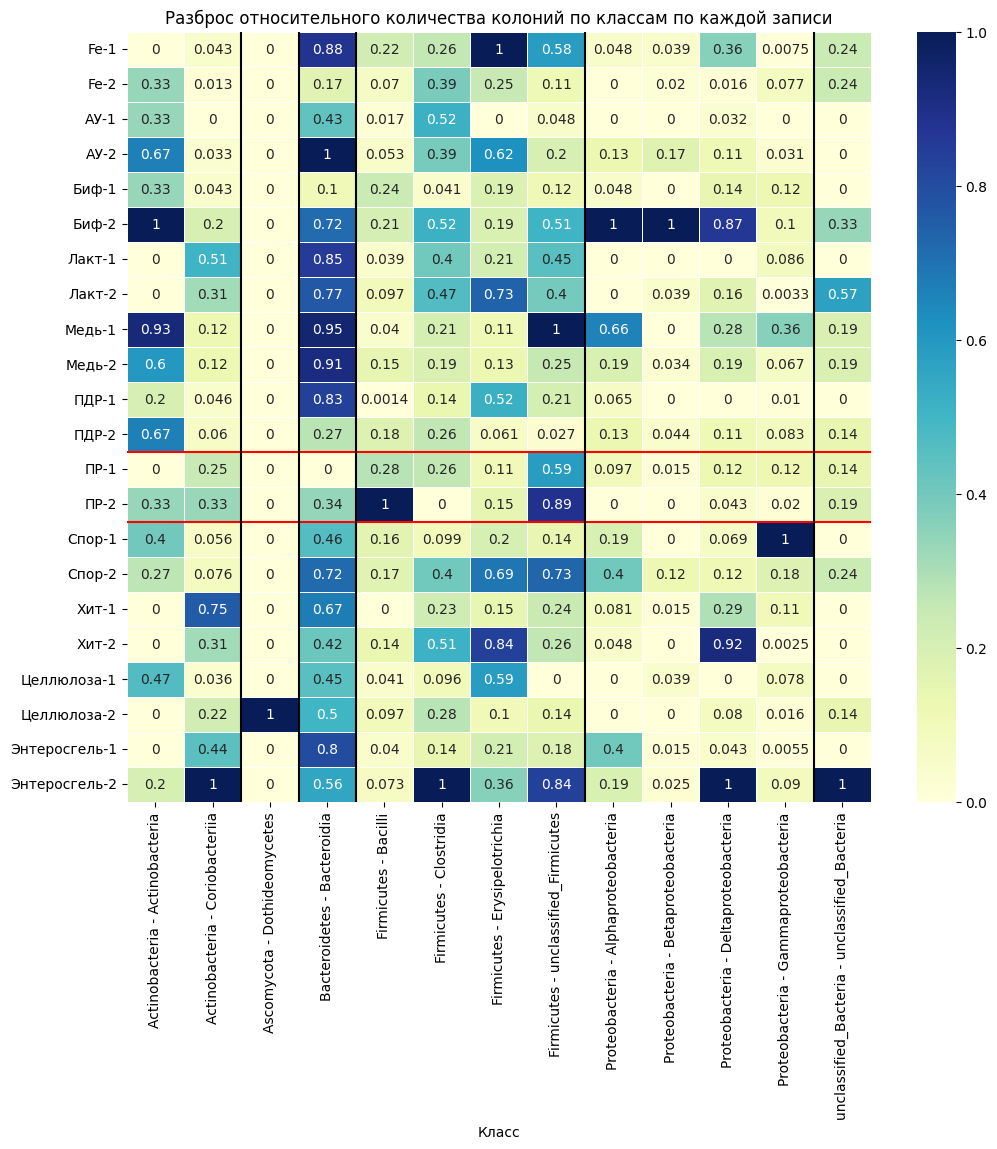

In [24]:
def plot_heatmap_colonies_by_class():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['phylum', 'class'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['group', 'number'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter)
    y_labels = table['group'] + '-' + table['number'].astype('str')
    x_labels = [f'{x[0]} - {x[1]}' for x in table_filter.columns]
    fig, ax = plt.subplots(figsize=(12, 10))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidths=0.5)
    axes.set_xlabel('Класс')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10) 
    # Ищем ПР в лейблах
    index_target = list(table['group']).index(GROUP_CLEAN)
    if index_target != -1:
        axes.axhline(y=index_target, linewidth=1.5, color="red")
        axes.axhline(y=index_target+2, linewidth=1.5, color="red")

    # Пробуем нарисовать линии между группами
    macro_groups_labels = [x[0] for x in table_filter.columns]
    for i in range(1, len(macro_groups_labels)):
        if macro_groups_labels[i] != macro_groups_labels[i-1]:
            axes.axvline(x=i, linewidth=1.5, color="black")

    plt.title("Разброс относительного количества колоний по классам по каждой записи")
plot_heatmap_colonies_by_class()

Посмотрим на доли

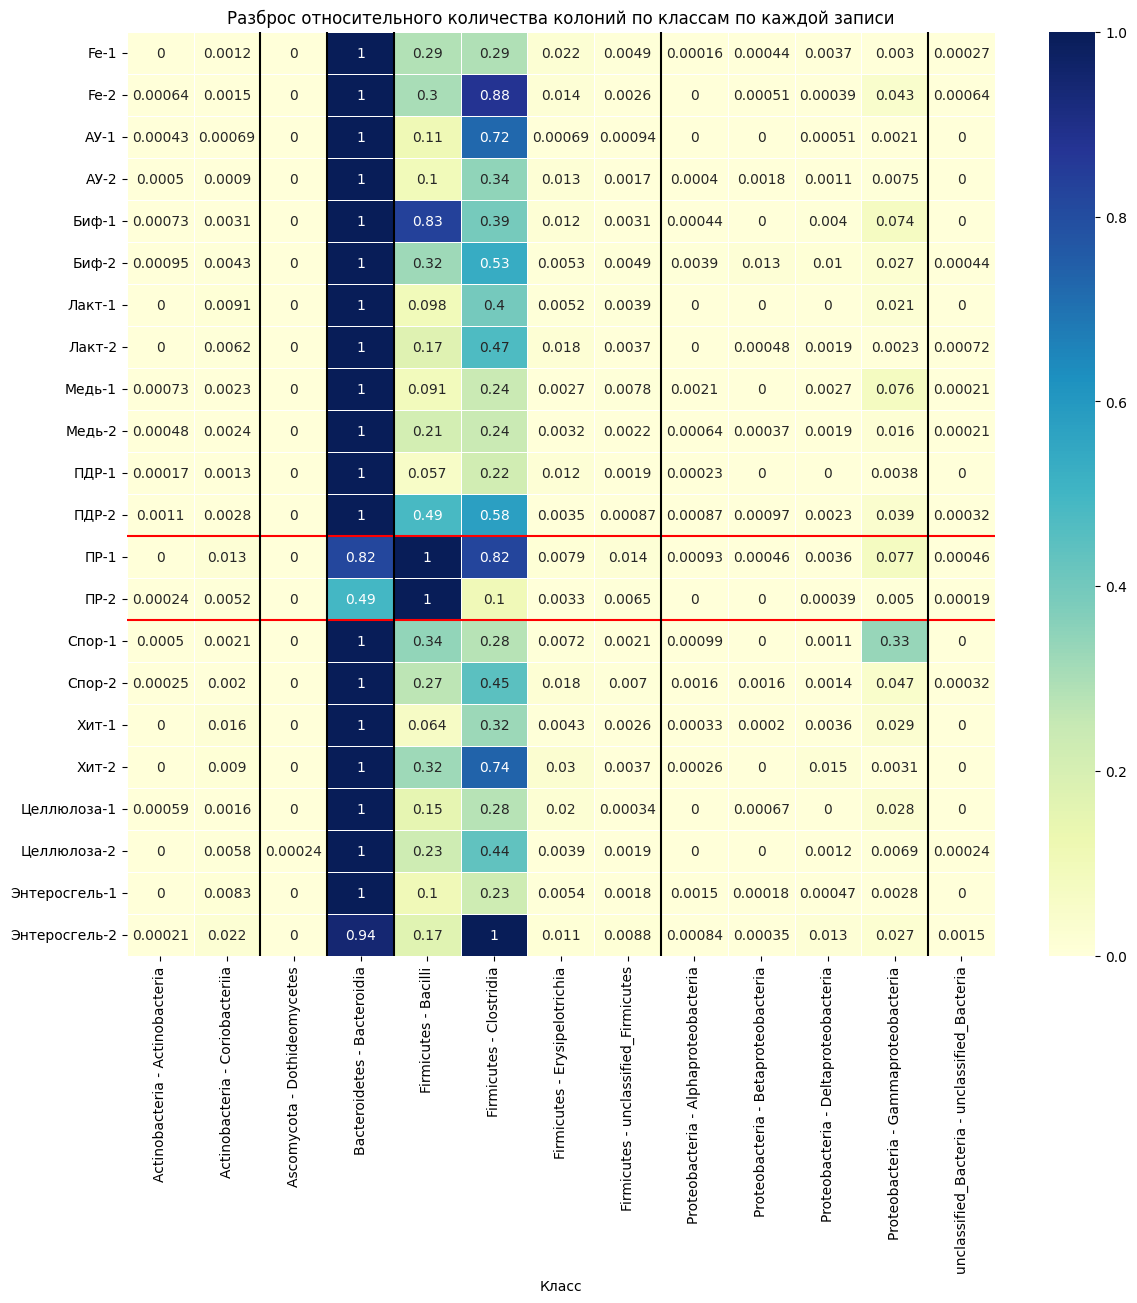

In [25]:
def plot_heatmap_colonies_by_class_frac():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['phylum', 'class'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['group', 'number'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter.T).T
    y_labels = table['group'] + '-' + table['number'].astype('str')
    x_labels = [f'{x[0]} - {x[1]}' for x in table_filter.columns]
    fig, ax = plt.subplots(figsize=(14, 12))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidths=0.5)
    axes.set_xlabel('Класс')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10) 
    # Ищем ПР в лейблах
    index_target = list(table['group']).index(GROUP_CLEAN)
    if index_target != -1:
        axes.axhline(y=index_target, linewidth=1.5, color="red")
        axes.axhline(y=index_target+2, linewidth=1.5, color="red")

    # Пробуем нарисовать линии между группами
    macro_groups_labels = [x[0] for x in table_filter.columns]
    for i in range(1, len(macro_groups_labels)):
        if macro_groups_labels[i] != macro_groups_labels[i-1]:
            axes.axvline(x=i, linewidth=1.5, color="black")

    plt.title("Разброс относительного количества колоний по классам по каждой записи")
plot_heatmap_colonies_by_class_frac()

##### 2.3.4 Порядок

In [26]:
pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['class', 'order'], aggfunc='sum').reset_index()

class        group number Actinobacteria                 Alphaproteobacteria  \
order                      Micrococcales Mycobacteriales       Kiloniellales   
0               Fe      1              0               0                   3   
1               Fe      2              0               5                   0   
2               АУ      1              0               5                   0   
3               АУ      2             10               0                   8   
4              Биф      1              0               5                   0   
5              Биф      2             15               0                  56   
6             Лакт      1              0               0                   0   
7             Лакт      2              0               0                   0   
8             Медь      1              8               6                  33   
9             Медь      2              0               9                   6   
10             ПДР      1              0               3                   0   
11             ПДР      2             10               0                   8   
12              ПР      1              0               0                   6   
13              ПР      2              0               5                   0   
14            Спор      1              3               3                   0   
15            Спор      2              0               4                  19   
16             Хит      1              0               0                   0   
17             Хит      2              0               0                   3   
18       Целлюлоза      1              4               3                   0   
19       Целлюлоза      2              0               0                   0   
20     Энтеросгель      1              0               0                  25   
21     Энтеросгель      2              0               3                   8   

class                Bacilli                   Bacteroidia Betaproteobacteria  \
order Rhizobiales Bacillales Lactobacillales Bacteroidales    Burkholderiales   
0               0          6            5222         18199                  8   
1               0        170            2180          7786                  4   
2               0          6            1308         11661                  0   
3               0          0            2013         19938                 35   
4               3         85            5584          6811                  0   
5               6        255            4835         15797                203   
6               0          4            1739         17777                  0   
7               0         19            2870         16562                  8   
8               8         18            1741         19231                  0   
9               6         43            3904         18686                  7   
10              4          4             993         17516                  0   
11              0         10            4481          9243                  9   
12              0          9            6452          5295                  3   
13              0         20           20739         10265                  0   
14             12         48            4083         12068                  0   
15              6        161            4103         15830                 25   
16              5        104             865         15173                  3   
17              0         95            3602         11407                  0   
18              0         13            1772         11894                  8   
19              0          6            2874         12665                  0   
20              0         62            1690         17062                  3   
21              4        209            2208         13460                  5   

class    Clostridia Coriobacteriia Deltaproteobacteria  \
order Clostridiales Eggerthellales   Bdellovibrionales   
0              527

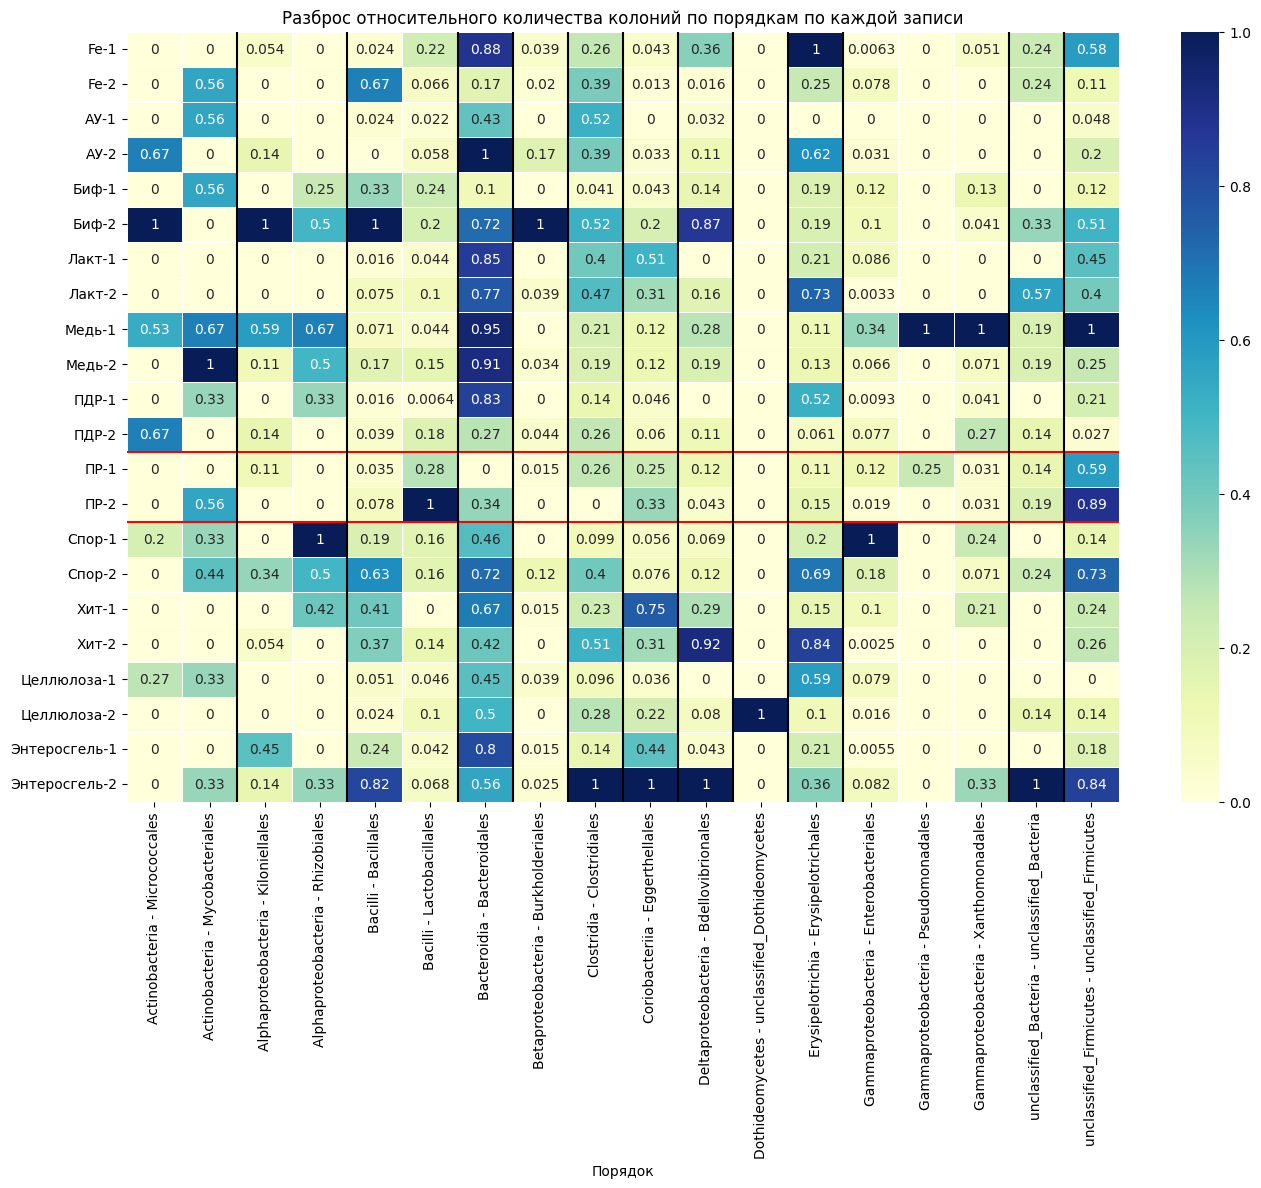

In [27]:
def plot_heatmap_colonies_by_class():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['class', 'order'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['group', 'number'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter)
    y_labels = table['group'] + '-' + table['number'].astype('str')
    x_labels = [f'{x[0]} - {x[1]}' for x in table_filter.columns]
    fig, ax = plt.subplots(figsize=(16, 10))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidths=0.5)
    axes.set_xlabel('Порядок')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
    # Ищем ПР в лейблах
    index_target = list(table['group']).index(GROUP_CLEAN)
    if index_target != -1:
        axes.axhline(y=index_target, linewidth=1.5, color="red")
        axes.axhline(y=index_target+2, linewidth=1.5, color="red")

    # Пробуем нарисовать линии между группами
    macro_groups_labels = [x[0] for x in table_filter.columns]
    for i in range(1, len(macro_groups_labels)):
        if macro_groups_labels[i] != macro_groups_labels[i-1]:
            axes.axvline(x=i, linewidth=1.5, color="black")

    plt.title("Разброс относительного количества колоний по порядкам по каждой записи")
plot_heatmap_colonies_by_class()

Посмотрим на доли внутри записи

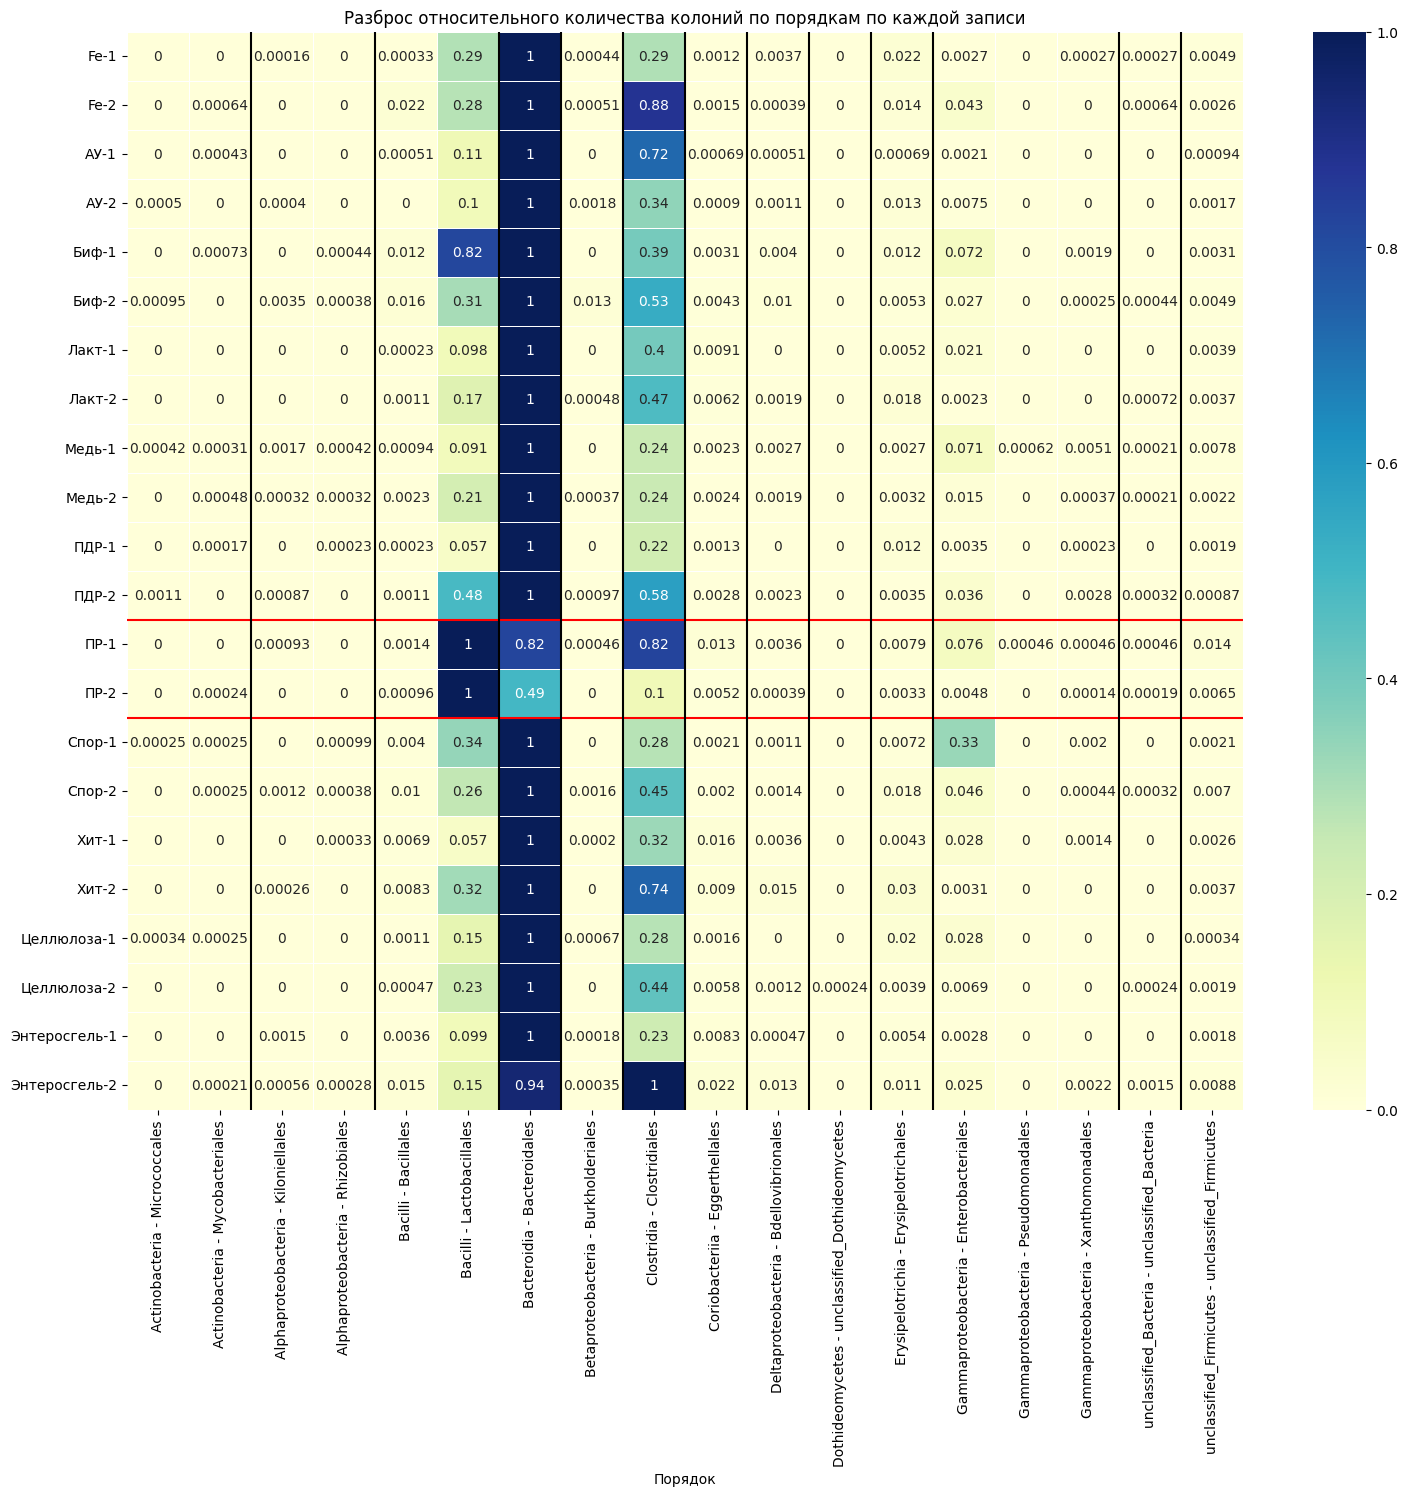

In [28]:
def plot_heatmap_colonies_by_class_frac():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['class', 'order'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['group', 'number'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter.T).T
    y_labels = table['group'] + '-' + table['number'].astype('str')
    x_labels = [f'{x[0]} - {x[1]}' for x in table_filter.columns]
    fig, ax = plt.subplots(figsize=(18, 14))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidths=0.5)
    axes.set_xlabel('Порядок')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
    # Ищем ПР в лейблах
    index_target = list(table['group']).index(GROUP_CLEAN)
    if index_target != -1:
        axes.axhline(y=index_target, linewidth=1.5, color="red")
        axes.axhline(y=index_target+2, linewidth=1.5, color="red")

    # Пробуем нарисовать линии между группами
    macro_groups_labels = [x[0] for x in table_filter.columns]
    for i in range(1, len(macro_groups_labels)):
        if macro_groups_labels[i] != macro_groups_labels[i-1]:
            axes.axvline(x=i, linewidth=1.5, color="black")

    plt.title("Разброс относительного количества колоний по порядкам по каждой записи")
plot_heatmap_colonies_by_class_frac()

##### 2.3.5 Семейство

In [29]:
pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['order', 'family'], columns=['group', 'number'], aggfunc='sum').reset_index()

group                          order                             family  \
number                                                                    
0                         Bacillales                      Bacillaceae 1   
1                         Bacillales            unclassified_Bacillales   
2                      Bacteroidales                     Bacteroidaceae   
3                      Bacteroidales                    Barnesiellaceae   
4                      Bacteroidales                     Muribaculaceae   
5                      Bacteroidales                      Rikenellaceae   
6                      Bacteroidales       unclassified_"Bacteroidales"   
7                  Bdellovibrionales                 Bdellovibrionaceae   
8                    Burkholderiales                     Sutterellaceae   
9                      Clostridiales                   Catabacteriaceae   
10                     Clostridiales                Christensenellaceae   
11                     Clostridiales                   Clostridiaceae 1   
12                     Clostridiales  Clostridiales_Incertae Sedis XIII   
13                     Clostridiales                     Eubacteriaceae   
14                     Clostridiales                    Lachnospiraceae   
15                     Clostridiales                   Peptococcaceae 1   
16                     Clostridiales                   Peptococcaceae 2   
17                     Clostridiales              Peptostreptococcaceae   
18                     Clostridiales                    Ruminococcaceae   
19                     Clostridiales         unclassified_Clostridiales   
20                    Eggerthellales                    Eggerthellaceae   
21                 Enterobacteriales                 Enterobacteriaceae   
22                Erysipelotrichales                Erysipelotrichaceae   
23                     Kiloniellales                     Kiloniellaceae   
24                   Lactobacillales                  Carnobacteriaceae   
25                   Lactobacillales                    Enterococcaceae   
26                   Lactobacillales                   Lactobacillaceae   
27                   Lactobacillales                   Streptococcaceae   
28                   Lactobacillales       unclassified_Lactobacillales   
29                     Micrococcales                     Micrococcaceae   
30                   Mycobacteriales                 Corynebacteriaceae   
31                   Pseudomonadales                      Moraxellaceae   
32                       Rhizobiales                       Brucellaceae   
33                   Xanthomonadales                   Xanthomonadaceae   
34             unclassified_Bacteria              unclassified_Bacteria   
35      unclassified_Dothideomycetes       unclassified_Dothideomycetes   
36           unclassified_Firmicutes            unclassified_Firmicutes   

group      Fe          АУ          Биф          Лакт        ...    ПР         \
number      1     2     1      2     1      2      1     2  ...     1      2   
0           6   164     6      0    72     92      4     5  ...     9     20   
1           0     6     0      0    13    163      0    14  ...     0      0   
2       13395  7235  7953  18759  2428  10263  12777  9116  ...  3170   8826   
3         813    13    17     34    45    231     64    85  ...    23      7   
4           0     0     0      0     0      5     22     0  ...     0     10   
5        3991   538  3691   1145  4338   5298   4914  7361  ...  2102   1422   
6           0     0     0      0     0      0      0     0  ...     0      0   
7          68     3     6     21    27    163      0    31  ...    23      8   
8           8     4     0     35     0    203      0     8  ...     3      0   
9           7  1124     7    224   104     60      0    22  ...     0      0   
10          3     0     0      0     0      0      0     0  ...     0      0   
11          0     0     0      0  

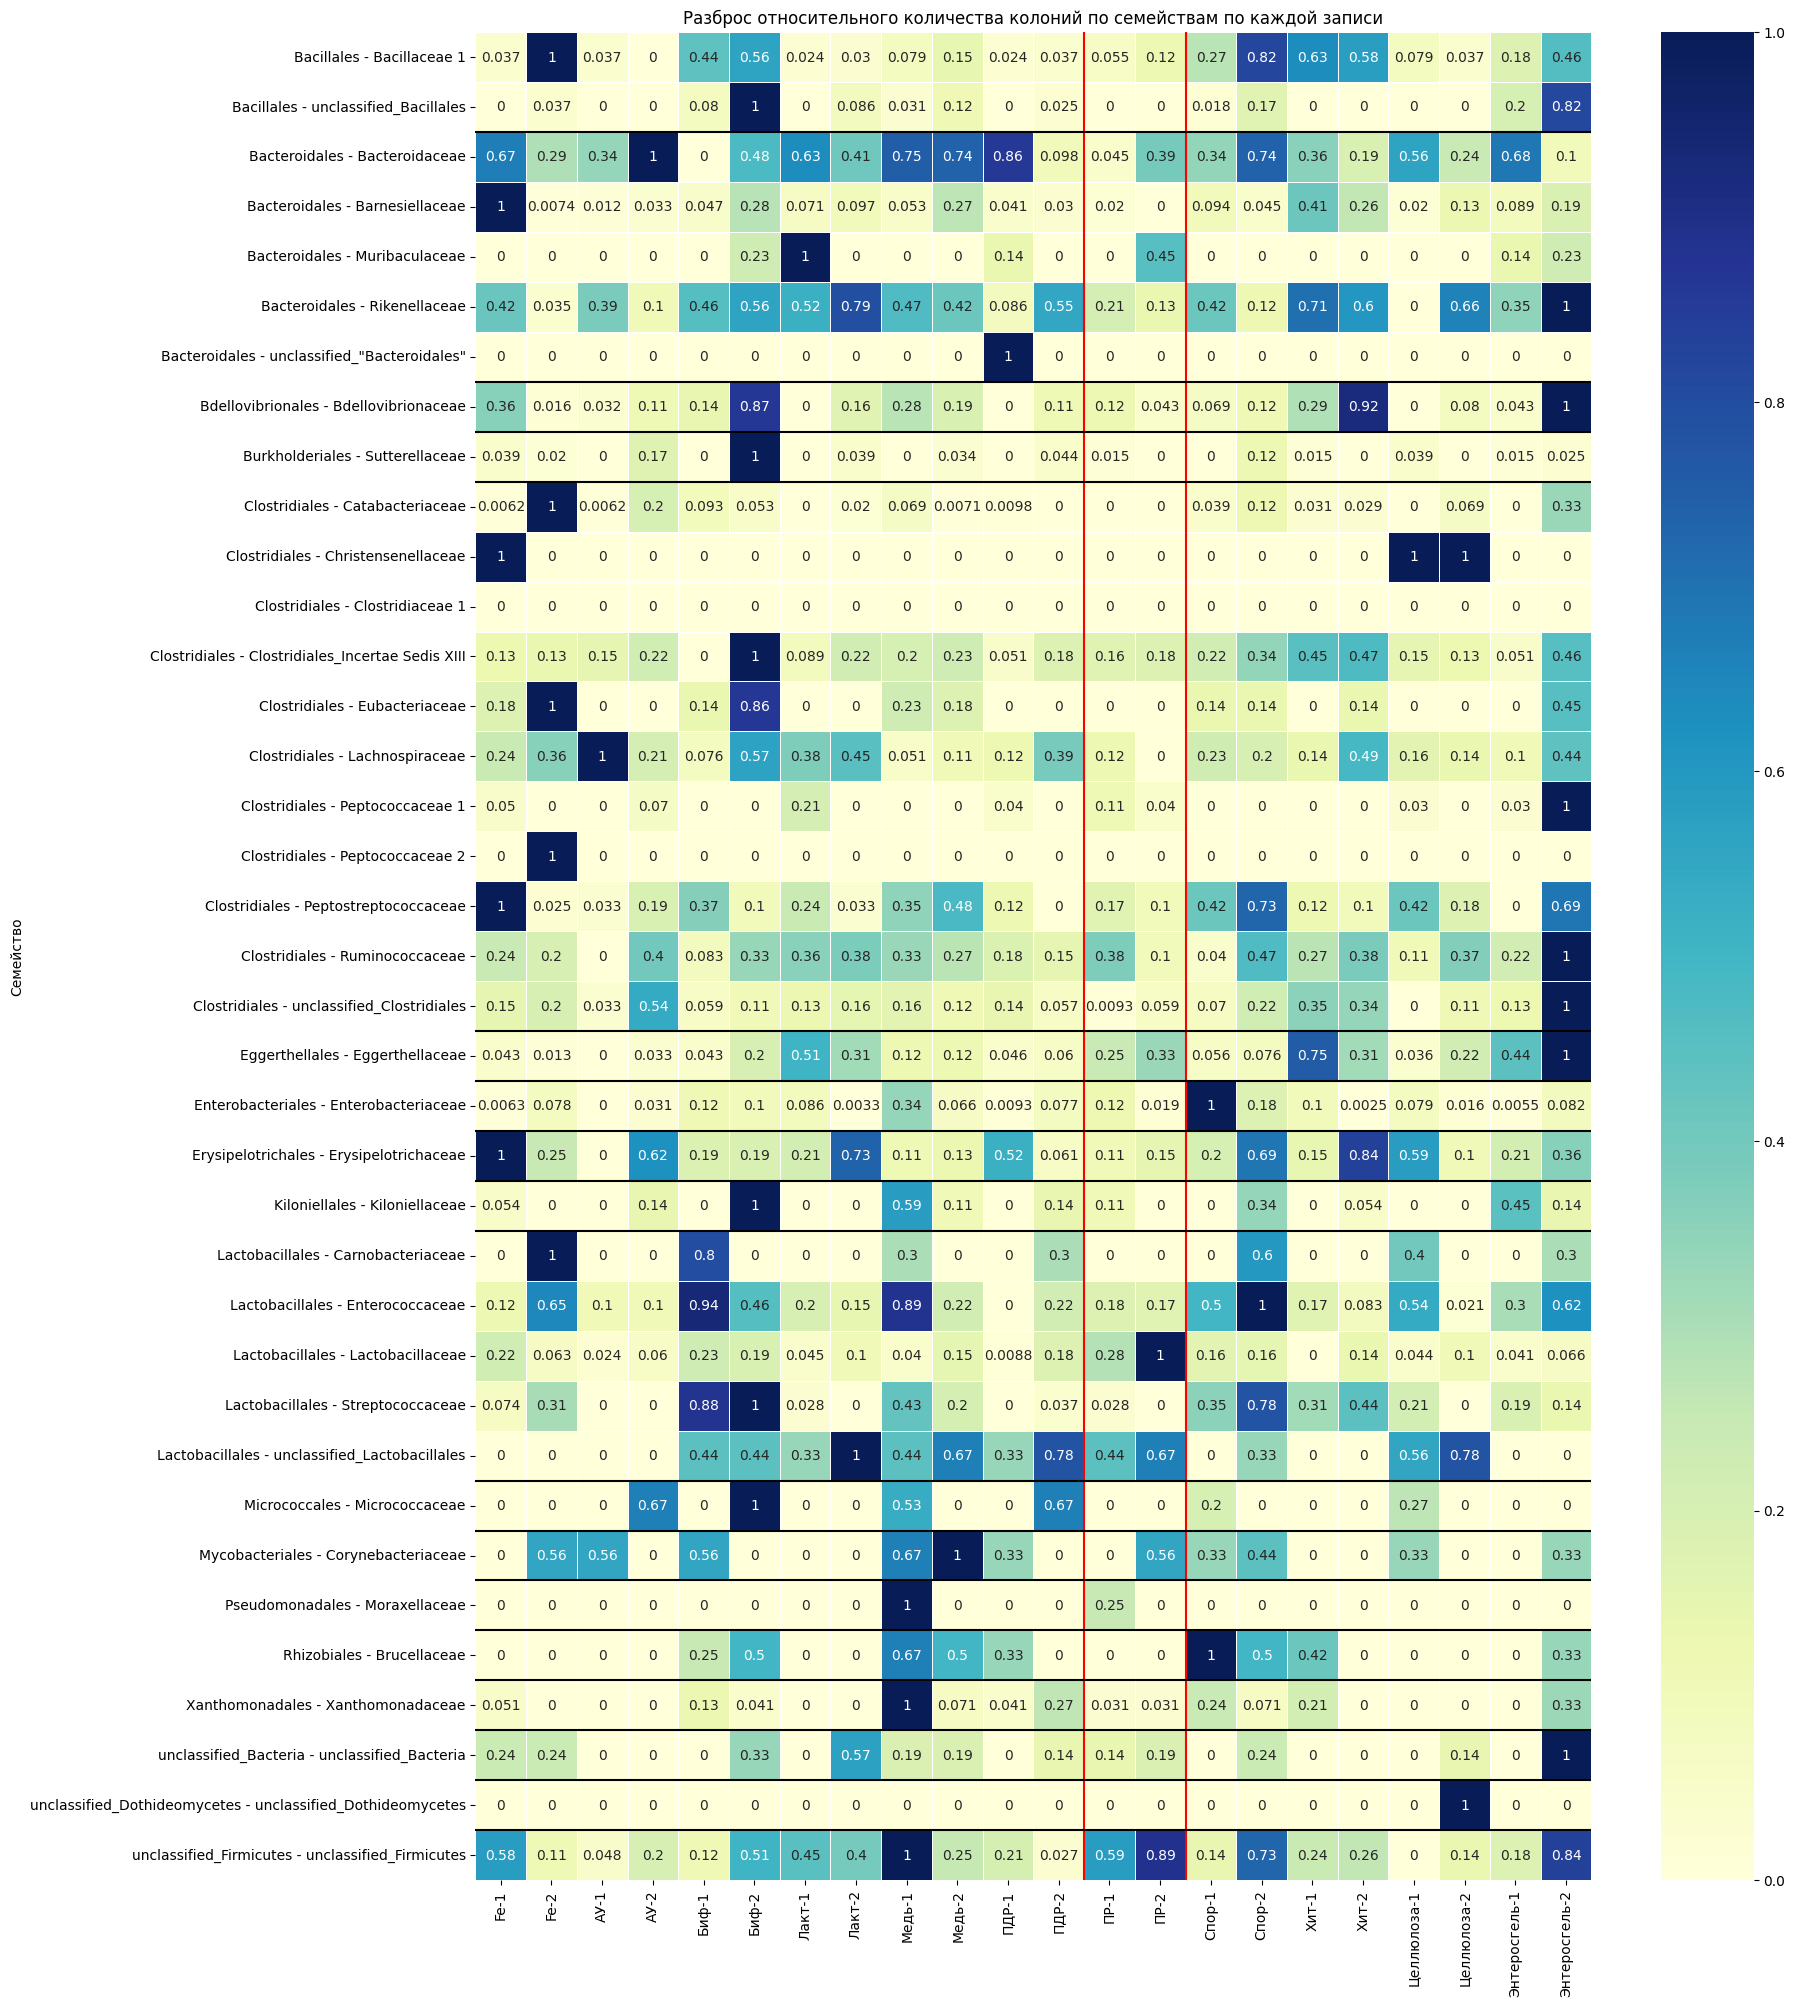

In [30]:
def plot_heatmap_colonies_by_family():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['order', 'family'], columns=['group', 'number'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['order', 'family'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter.T).T
    y_labels = list((table['order'] + ' - ' + table['family']).values)
    x_labels = [f'{x[0]}-{str(x[1])}' for x in table_filter.columns]
    fig, ax = plt.subplots(figsize=(18, 24))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidth=.5)
    axes.set_ylabel('Семейство')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
    # Ищем ПР в лейблах
    index_target = [x[0] for x in table_filter.columns].index(GROUP_CLEAN)
    if index_target != -1:
        axes.axvline(x=index_target, linewidth=1.5, color="red")
        axes.axvline(x=index_target+2, linewidth=1.5, color="red")
    plt.title("Разброс относительного количества колоний по семействам по каждой записи")

    # Пробуем нарисовать линии между группами
    macro_groups_labels = [x for x in list(table.order.values)]
    for i in range(1, len(macro_groups_labels)):
        if macro_groups_labels[i] != macro_groups_labels[i-1]:
            axes.axhline(y=i, linewidth=1.5, color="black")
plot_heatmap_colonies_by_family()

Посмотрим доли по каждой записи

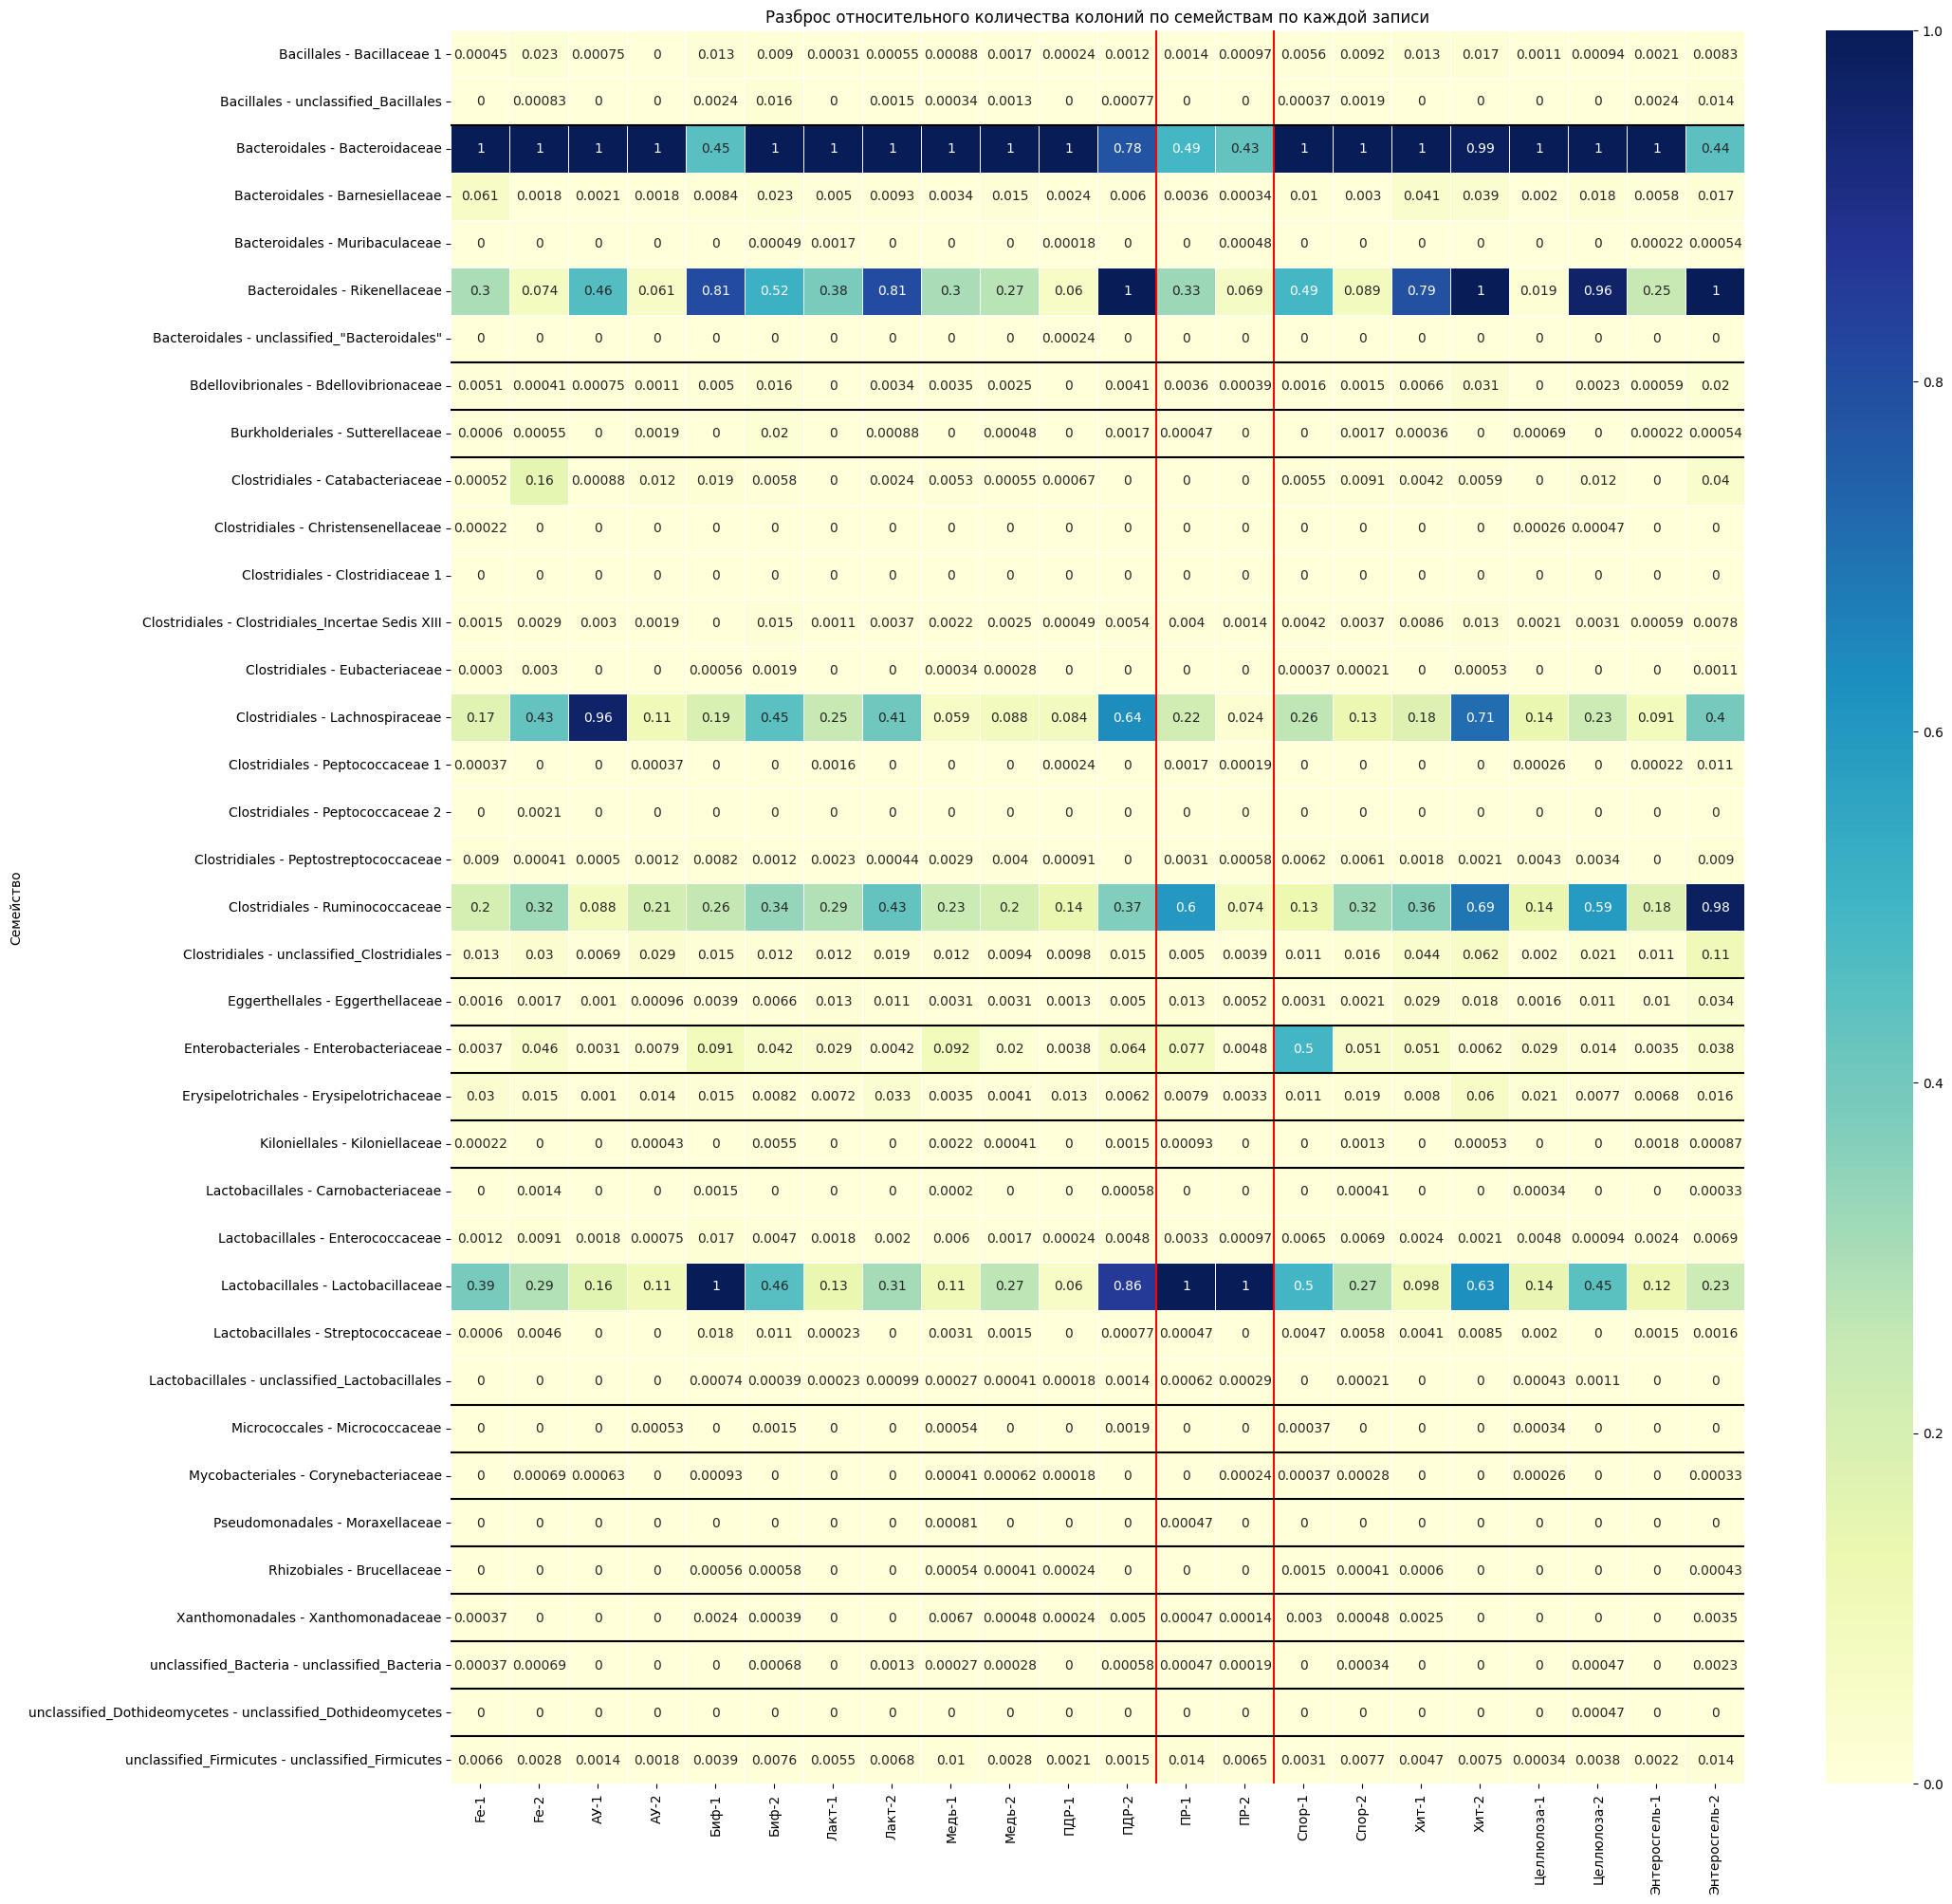

In [31]:
def plot_heatmap_colonies_by_family_frac():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['order', 'family'], columns=['group', 'number'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['order', 'family'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter)
    y_labels = list((table['order'] + ' - ' + table['family']).values)
    x_labels = [f'{x[0]}-{str(x[1])}' for x in table_filter.columns]
    fig, ax = plt.subplots(figsize=(22, 24))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidth=.5)
    axes.set_ylabel('Семейство')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
    # Ищем ПР в лейблах
    index_target = [x[0] for x in table_filter.columns].index(GROUP_CLEAN)
    if index_target != -1:
        axes.axvline(x=index_target, linewidth=1.5, color="red")
        axes.axvline(x=index_target+2, linewidth=1.5, color="red")
    plt.title("Разброс относительного количества колоний по семействам по каждой записи")

    # Пробуем нарисовать линии между группами
    macro_groups_labels = [x for x in list(table.order.values)]
    for i in range(1, len(macro_groups_labels)):
        if macro_groups_labels[i] != macro_groups_labels[i-1]:
            axes.axhline(y=i, linewidth=1.5, color="black")
plot_heatmap_colonies_by_family_frac()

Рассмотрим 2 семейства подробнее `Bacteroidaceae` и `Lactobacillaceae`

In [32]:
df_family[df_family['name'].isin(['Bacteroidaceae', 'Lactobacillaceae'])]

,id,id_order,name
3,4,4,Bacteroidaceae
12,13,6,Lactobacillaceae


Посмотрим диаграмму размаха для `Bacteroidaceae`

In [33]:
df_clean[['group', 'number'] + list(df_species[df_species['id_family'] == 4]['name'].values)]

,group,number,Bacteroides,Mediterranea,Phocaeicola,unclassified_Bacteroidaceae
0,ПР,1,2925,0,4,241
1,ПР,2,8740,0,16,70
2,ПДР,1,16384,8,5,84
3,ПДР,2,3394,0,6,631
4,Целлюлоза,1,11597,3,4,48
5,Целлюлоза,2,5863,6,0,526
6,Лакт,1,12634,0,16,127
7,Лакт,2,7797,7,0,1312
8,Энтеросгель,1,13295,0,10,299
9,Энтеросгель,2,3941,0,9,136


          group    sum
15           Fe   7235
14           Fe  13395
10           АУ   7953
11           АУ  18759
17          Биф  10263
16          Биф   2428
6          Лакт  12777
7          Лакт   9116
13         Медь  14490
12         Медь  14728
2           ПДР  16481
3           ПДР   4031
0            ПР   3170
1            ПР   8826
18         Спор   8028
19         Спор  14500
20          Хит   8277
21          Хит   5554
5     Целлюлоза   6395
4     Целлюлоза  11652
9   Энтеросгель   4086
8   Энтеросгель  13604


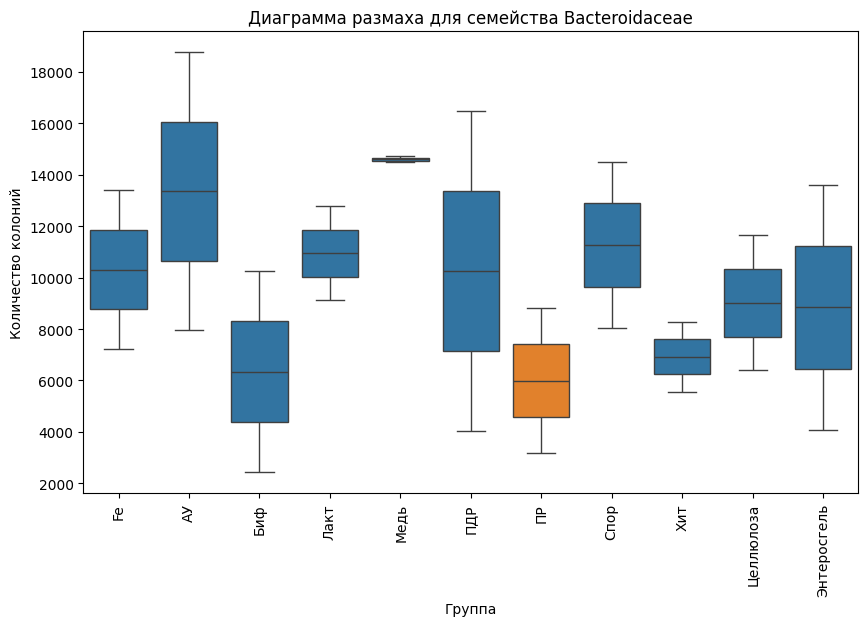

In [34]:
def plot_colonies_in_family_4():
    df = df_clean[['group', 'number'] + list(df_species[df_species['id_family'] == 4]['name'].values)]
    group_counts = df[['group']]
    group_counts['sum'] = df.drop(columns=['number']).sum(axis=1, numeric_only=True)
    group_counts = group_counts.sort_values(by=['group'])
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('Группа')
    ax.set_ylabel('Количество колоний')
    colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in group_counts.group.unique()]
    ax.tick_params(axis='x', labelrotation=90)
    print(group_counts)
    sns.boxplot(data=group_counts, x='group', y='sum', ax=ax, palette=colors)
    plt.title("Диаграмма размаха для семейства Bacteroidaceae")
plot_colonies_in_family_4()

Посмотрим диаграмму размаха для `Lactobacillaceae`

In [35]:
df_clean[['group', 'number'] + list(df_species[df_species['id_family'] == 13]['name'].values)]

,group,number,Lactobacillus,Leuconostoc,Ligilactobacillus,Limosilactobacillus,unclassified_Lactobacillaceae,Weissella
0,ПР,1,5793,9,259,344,0,19
1,ПР,2,20103,0,130,463,0,17
2,ПДР,1,933,0,13,26,0,14
3,ПДР,2,3961,5,59,407,0,10
4,Целлюлоза,1,1569,4,60,39,0,12
5,Целлюлоза,2,2591,0,186,78,0,6
6,Лакт,1,1310,11,300,76,0,13
7,Лакт,2,2715,3,68,54,0,3
8,Энтеросгель,1,1199,12,201,174,0,50
9,Энтеросгель,2,842,19,255,958,0,52


          group    sum
15           Fe   2071
14           Fe   5198
10           АУ   1294
11           АУ   1999
17          Биф   4675
16          Биф   5383
6          Лакт   1710
7          Лакт   2843
13         Медь   3851
12         Медь   1599
2           ПДР    986
3           ПДР   4442
0            ПР   6424
1            ПР  20713
18         Спор   3993
19         Спор   3910
20          Хит    811
21          Хит   3542
5     Целлюлоза   2861
4     Целлюлоза   1684
9   Энтеросгель   2126
8   Энтеросгель   1636


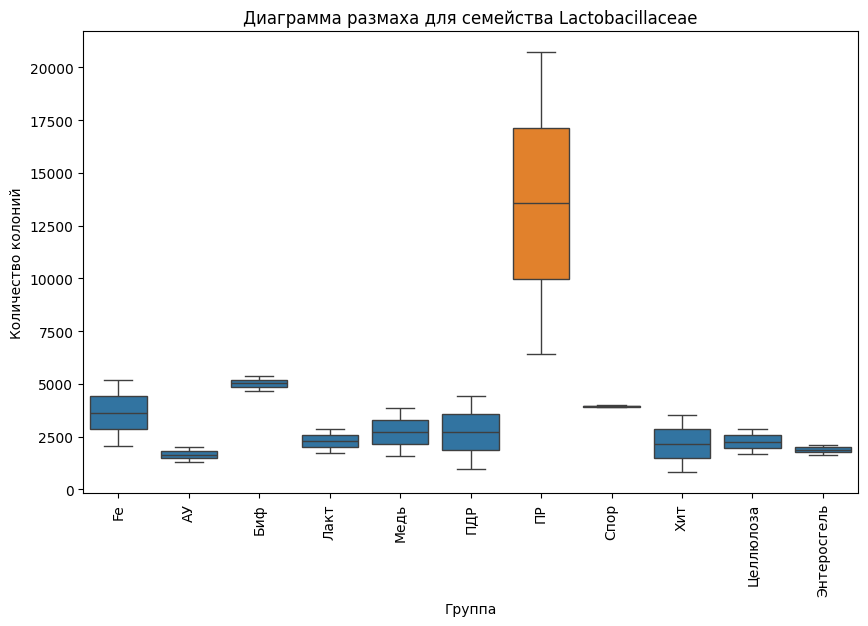

In [36]:
def plot_colonies_in_family_13():
    df = df_clean[['group', 'number'] + list(df_species[df_species['id_family'] == 13]['name'].values)]
    group_counts = df[['group']]
    group_counts['sum'] = df.drop(columns=['number']).sum(axis=1, numeric_only=True)
    group_counts = group_counts.sort_values(by=['group'])
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('Группа')
    ax.set_ylabel('Количество колоний')
    colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in group_counts.group.unique()]
    ax.tick_params(axis='x', labelrotation=90)
    print(group_counts)
    sns.boxplot(data=group_counts, x='group', y='sum', ax=ax, palette=colors)
    plt.title("Диаграмма размаха для семейства Lactobacillaceae")
plot_colonies_in_family_13()

### 3. Кластеризация

#### 3.1 t-SNE

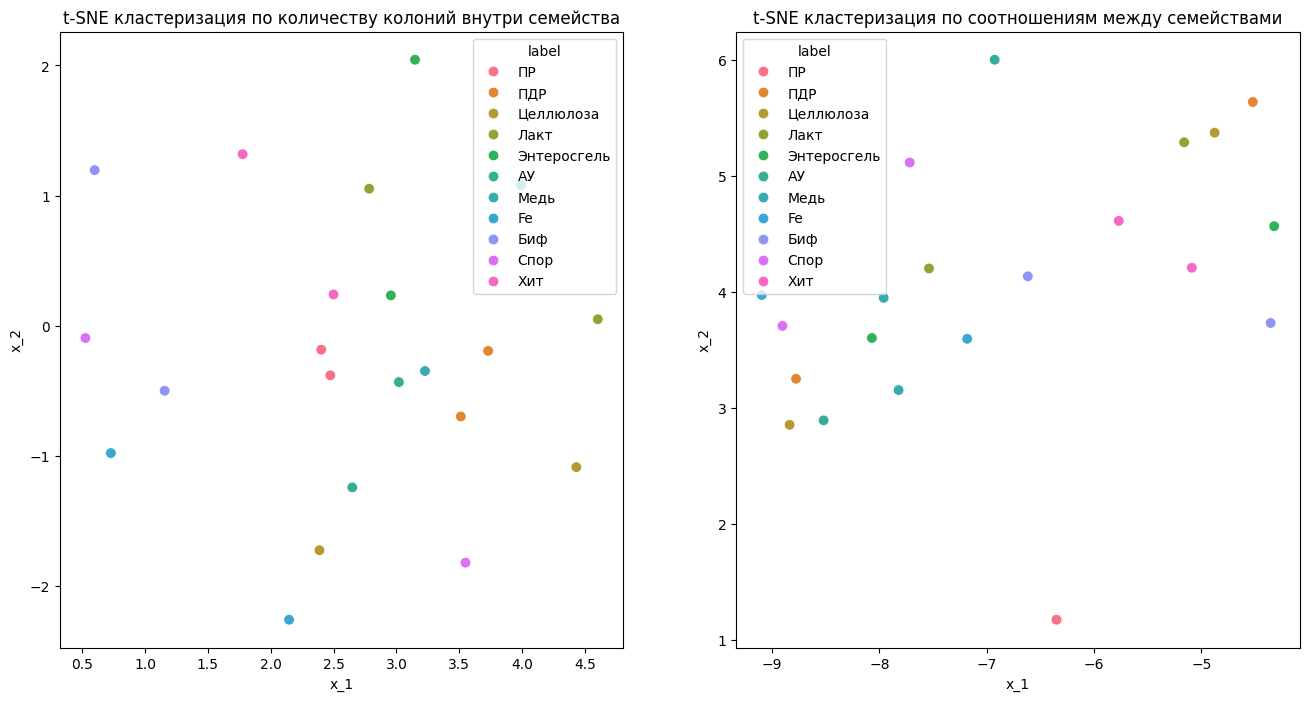

In [37]:
def plot_tsne():
    #table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['order', 'family'], aggfunc='sum').reset_index()
    table = df_clean
    columns_new = ['group', 'number'] + [x[1] for x in table.columns[2:]]
    df_ = pd.DataFrame(table.values, columns=columns_new)
    scaler = MinMaxScaler()
    
    df_fraq = df_.copy()
    df_scale = df_.copy()

    df_fraq.iloc[:,2:] = scaler.fit_transform(df_.iloc[:,2:].T).T
    df_scale.iloc[:,2:] = scaler.fit_transform(df_.iloc[:,2:])

    data_fraq_transform = TSNE(n_components=2,random_state=10, perplexity=11).fit_transform(df_fraq.iloc[:,2:])
    df_fraq_transform = pd.DataFrame(data_fraq_transform, columns=['x_1', 'x_2'])
    df_fraq_transform['label'] = df_fraq['group']

    data_scale_transform = TSNE(n_components=2,random_state=10, perplexity=11).fit_transform(df_scale.iloc[:,2:])
    df_scale_transform = pd.DataFrame(data_scale_transform, columns=['x_1', 'x_2'])
    df_scale_transform['label'] = df_fraq['group']


    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    sns.scatterplot(x='x_1', y='x_2', hue='label', data=df_scale_transform, ax=axes[0], s=60)
    sns.scatterplot(x='x_1', y='x_2', hue='label', data=df_fraq_transform, ax=axes[1], s=60)
    axes[0].set_title("t-SNE кластеризация по количеству колоний внутри семейства")
    axes[1].set_title("t-SNE кластеризация по соотношениям между семействами")
plot_tsne()

#### 3.2 PCA

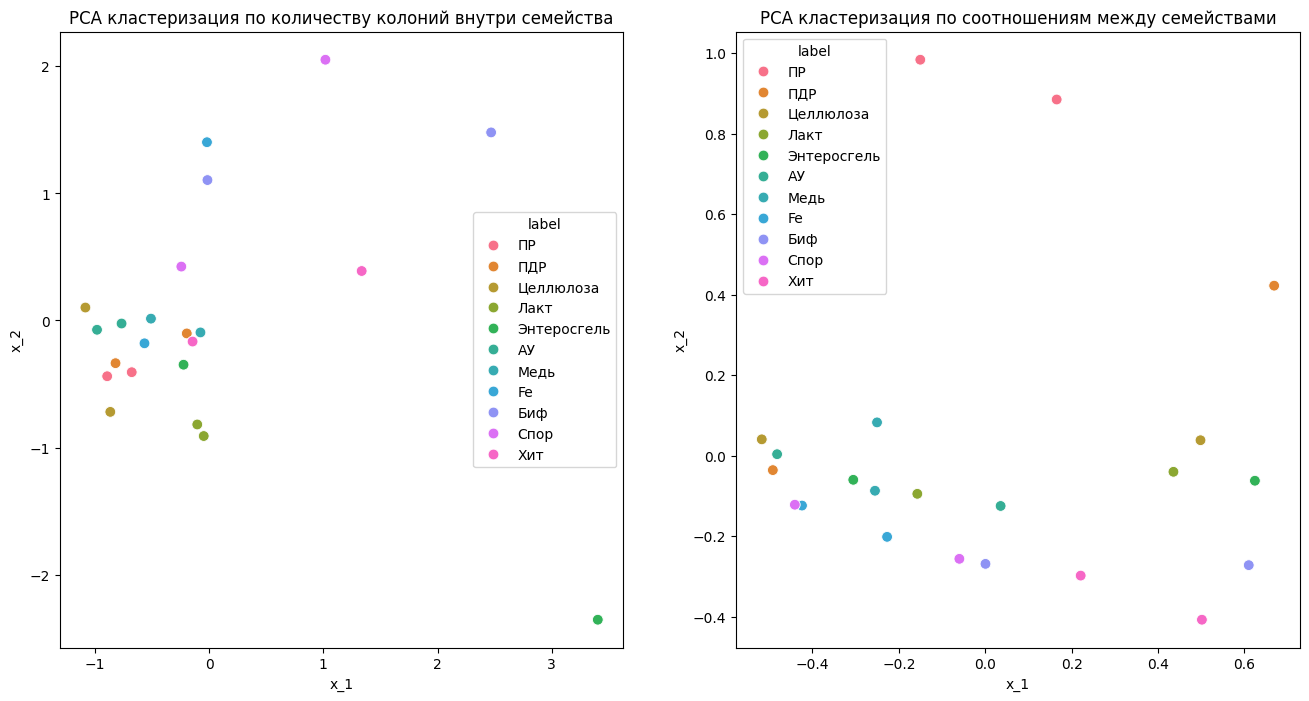

In [38]:
def plot_pca():
    #table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['order', 'family'], aggfunc='sum').reset_index()
    table = df_clean
    columns_new = ['group', 'number'] + [x[1] for x in table.columns[2:]]
    df_ = pd.DataFrame(table.values, columns=columns_new)
    scaler = MinMaxScaler()
    
    df_fraq = df_.copy()
    df_scale = df_.copy()

    df_fraq.iloc[:,2:] = scaler.fit_transform(df_.iloc[:,2:].T).T
    df_scale.iloc[:,2:] = scaler.fit_transform(df_.iloc[:,2:])

    data_fraq_transform = PCA(n_components=2).fit_transform(df_fraq.iloc[:,2:])
    df_fraq_transform = pd.DataFrame(data_fraq_transform, columns=['x_1', 'x_2'])
    df_fraq_transform['label'] = df_fraq['group']

    data_scale_transform = PCA(n_components=2).fit_transform(df_scale.iloc[:,2:])
    df_scale_transform = pd.DataFrame(data_scale_transform, columns=['x_1', 'x_2'])
    df_scale_transform['label'] = df_fraq['group']


    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    sns.scatterplot(x='x_1', y='x_2', hue='label', data=df_scale_transform, ax=axes[0], s=60)
    sns.scatterplot(x='x_1', y='x_2', hue='label', data=df_fraq_transform, ax=axes[1], s=60)
    axes[0].set_title("PCA кластеризация по количеству колоний внутри семейства")
    axes[1].set_title("PCA кластеризация по соотношениям между семействами")
plot_pca()

На PCA кластеризации `ПР` объекты находятся вне основной другой группы

#### 3.3 PCoA 3D

In [39]:
def plot_pcoa():
    #table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['order', 'family'], aggfunc='sum').reset_index()
    table = df_clean
    columns_new = ['group', 'number'] + [x[1] for x in table.columns[2:]]
    df_ = pd.DataFrame(table.values, columns=columns_new)
    scaler = MinMaxScaler()
    
    df_fraq = df_.copy()
    df_scale = df_.copy()

    df_fraq.iloc[:,2:] = scaler.fit_transform(df_.iloc[:,2:].T).T
    df_scale.iloc[:,2:] = scaler.fit_transform(df_.iloc[:,2:])

    data_fraq_transform = MDS(n_components=3, dissimilarity='precomputed').fit_transform(pairwise_distances(df_fraq.iloc[:,2:], metric='euclidean'))
    df_fraq_transform = pd.DataFrame(data_fraq_transform, columns=['x_1', 'x_2', 'x_3'])
    df_fraq_transform['label'] = df_fraq['group']

    data_scale_transform = MDS(n_components=3, dissimilarity='precomputed').fit_transform(pairwise_distances(df_scale.iloc[:,2:], metric='euclidean'))
    df_scale_transform = pd.DataFrame(data_scale_transform, columns=['x_1', 'x_2', 'x_3'])
    df_scale_transform['label'] = df_fraq['group']

    cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax = Axes3D(fig, auto_add_to_figure=False)

    le = LabelEncoder()
    df_scale_transform['label_encoder'] = le.fit_transform(df_scale_transform['label'])

    print(le.classes_)

    sc = ax.scatter(df_scale_transform['x_1'], df_scale_transform['x_2'], df_scale_transform['x_3'], s=60, c=df_scale_transform['label_encoder'], marker='o', cmap=cmap, alpha=1)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    fig.add_axes(ax)
    fig.add_axes(ax)
    #sns.scatterplot(x='x_1', y='x_2', hue='label', data=df_fraq_transform, ax=axes[1], s=60)
    #axes[0].set_title("PCoA кластеризация по количеству колоний внутри семейства")
    #axes[1].set_title("PCoA кластеризация по соотношениям между семействами")
    plt.show()
plot_pcoa()

NameError: name 'ListedColormap' is not defined

['Fe' 'АУ' 'Биф' 'Лакт' 'Медь' 'ПДР' 'ПР' 'Спор' 'Хит' 'Целлюлоза'
 'Энтеросгель']


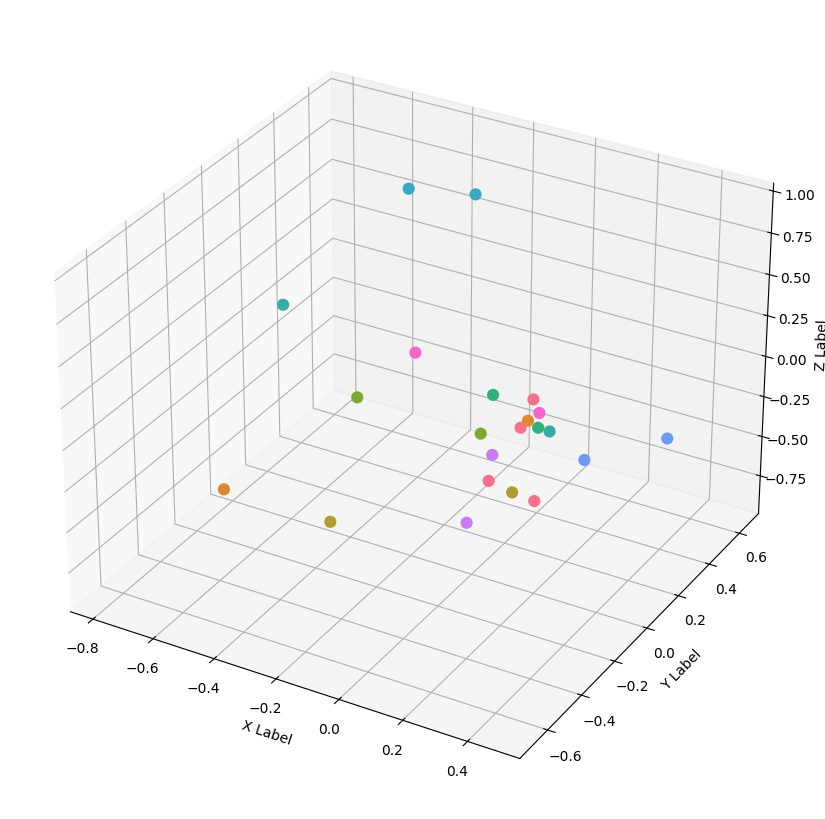

In [ ]:
def plot_pcoa():
    #table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['order', 'family'], aggfunc='sum').reset_index()
    table = df_clean
    columns_new = ['group', 'number'] + [x[1] for x in table.columns[2:]]
    df_ = pd.DataFrame(table.values, columns=columns_new)
    scaler = MinMaxScaler()
    
    df_fraq = df_.copy()
    df_scale = df_.copy()

    df_fraq.iloc[:,2:] = scaler.fit_transform(df_.iloc[:,2:].T).T
    df_scale.iloc[:,2:] = scaler.fit_transform(df_.iloc[:,2:])

    data_fraq_transform = MDS(n_components=3, dissimilarity='precomputed').fit_transform(pairwise_distances(df_fraq.iloc[:,2:], metric='euclidean'))
    df_fraq_transform = pd.DataFrame(data_fraq_transform, columns=['x_1', 'x_2', 'x_3'])
    df_fraq_transform['label'] = df_fraq['group']

    data_scale_transform = MDS(n_components=3, dissimilarity='precomputed').fit_transform(pairwise_distances(df_scale.iloc[:,2:], metric='euclidean'))
    df_scale_transform = pd.DataFrame(data_scale_transform, columns=['x_1', 'x_2', 'x_3'])
    df_scale_transform['label'] = df_fraq['group']

    cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax = Axes3D(fig, auto_add_to_figure=False)

    le = LabelEncoder()
    df_fraq_transform['label_encoder'] = le.fit_transform(df_fraq_transform['label'])

    print(le.classes_)

    sc = ax.scatter(df_fraq_transform['x_1'], df_fraq_transform['x_2'], df_fraq_transform['x_3'], s=60, c=df_fraq_transform['label_encoder'], marker='o', cmap=cmap, alpha=1)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    fig.add_axes(ax)
    fig.add_axes(ax)
    #sns.scatterplot(x='x_1', y='x_2', hue='label', data=df_fraq_transform, ax=axes[1], s=60)
    #axes[0].set_title("PCoA кластеризация по количеству колоний внутри семейства")
    #axes[1].set_title("PCoA кластеризация по соотношениям между семействами")
    plt.show()
plot_pcoa()

#### 3.4 Clustering plot

<class 'matplotlib.axis.YAxis'>


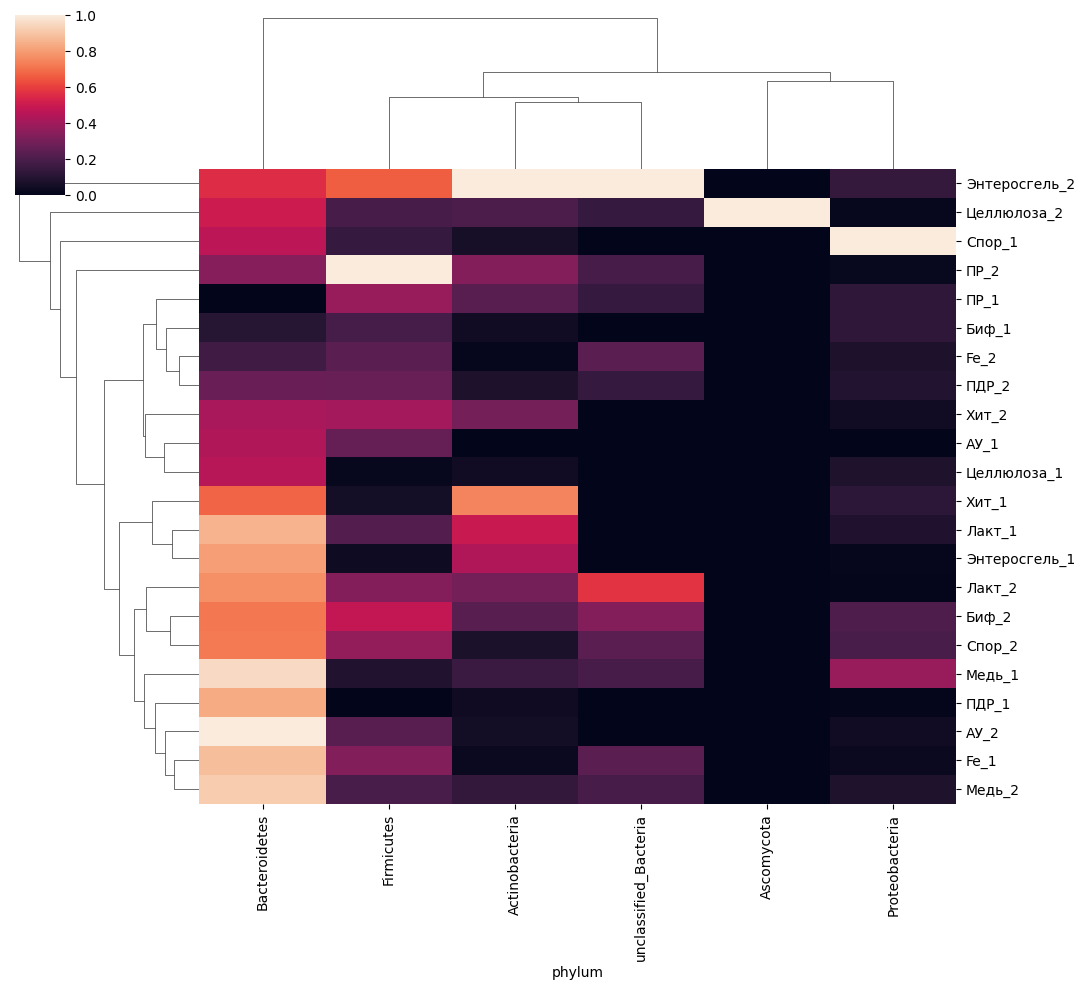

In [107]:
def plot_clustermap_phylum():
    scaler = MinMaxScaler()
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['phylum'], aggfunc='sum').reset_index()
    table.iloc[:,2:] = scaler.fit_transform(table.iloc[:,2:])
    table['index'] = table['group'] + '_' + table['number'].astype(str)
    table.set_index(['index'])
    table_2 = table.drop(columns=['number', 'group', 'index'])
    g = sns.clustermap(table_2)
    dict_replace = table['index'].to_dict()
    idx_replace = [int(x.get_text()) for x in g.ax_heatmap.yaxis.get_ticklabels()]
    y_ticklabels = [dict_replace[x] for x in idx_replace]
    print(type(g.ax_heatmap.yaxis))
    g.ax_heatmap.yaxis.set_ticklabels(y_ticklabels, rotation=0)
plot_clustermap_phylum()

<class 'matplotlib.axis.YAxis'>


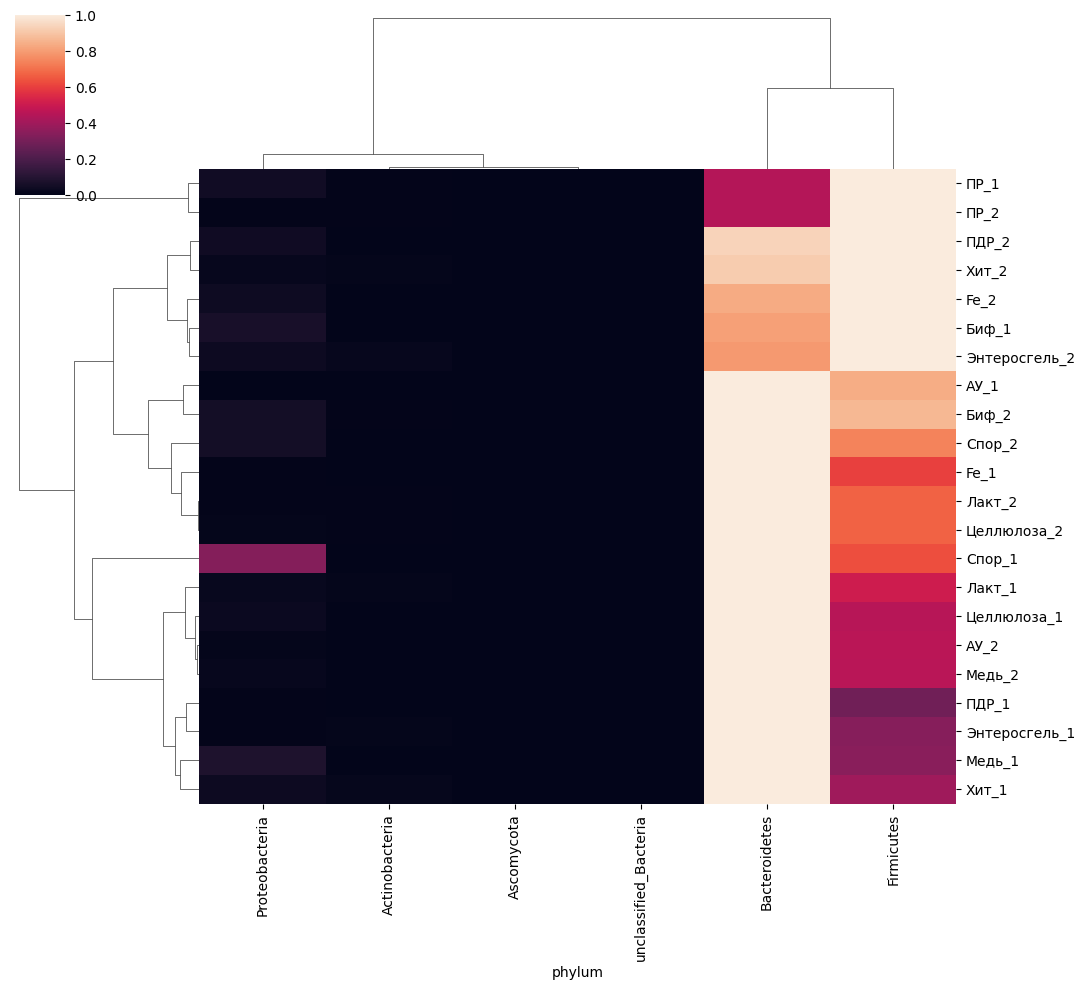

In [106]:
def plot_clustermap_phylum_fraq():
    scaler = MinMaxScaler()
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['phylum'], aggfunc='sum').reset_index()
    table.iloc[:,2:] = scaler.fit_transform(table.iloc[:,2:].T).T
    table['index'] = table['group'] + '_' + table['number'].astype(str)
    table.set_index(['index'])
    table_2 = table.drop(columns=['number', 'group', 'index'])
    g = sns.clustermap(table_2)
    dict_replace = table['index'].to_dict()
    idx_replace = [int(x.get_text()) for x in g.ax_heatmap.yaxis.get_ticklabels()]
    y_ticklabels = [dict_replace[x] for x in idx_replace]
    print(type(g.ax_heatmap.yaxis))
    g.ax_heatmap.yaxis.set_ticklabels(y_ticklabels, rotation=0)
plot_clustermap_phylum_fraq()

<class 'matplotlib.axis.YAxis'>


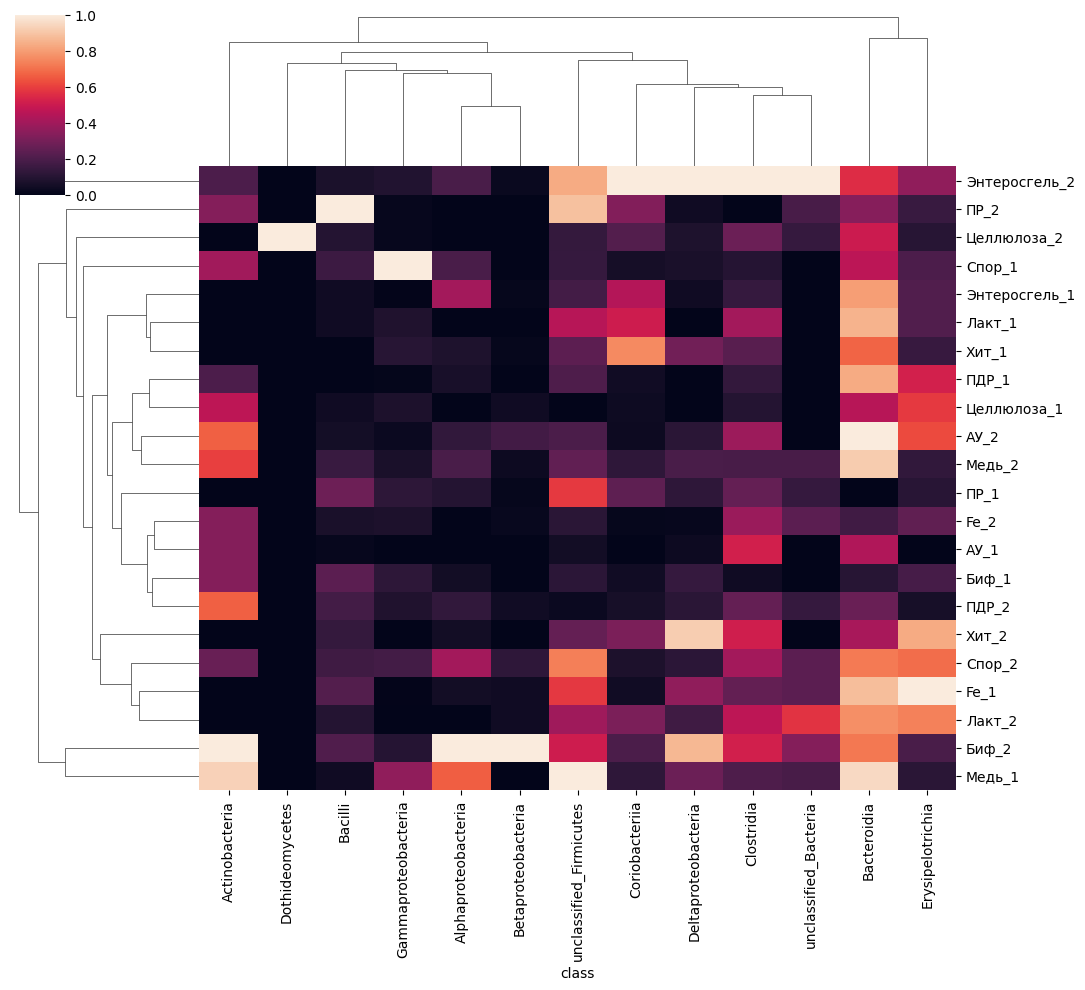

In [109]:
def plot_clustermap_class():
    scaler = MinMaxScaler()
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['class'], aggfunc='sum').reset_index()
    table.iloc[:,2:] = scaler.fit_transform(table.iloc[:,2:])
    table['index'] = table['group'] + '_' + table['number'].astype(str)
    table.set_index(['index'])
    table_2 = table.drop(columns=['number', 'group', 'index'])
    g = sns.clustermap(table_2)
    dict_replace = table['index'].to_dict()
    idx_replace = [int(x.get_text()) for x in g.ax_heatmap.yaxis.get_ticklabels()]
    y_ticklabels = [dict_replace[x] for x in idx_replace]
    print(type(g.ax_heatmap.yaxis))
    g.ax_heatmap.yaxis.set_ticklabels(y_ticklabels, rotation=0)
plot_clustermap_class()

<class 'matplotlib.axis.YAxis'>


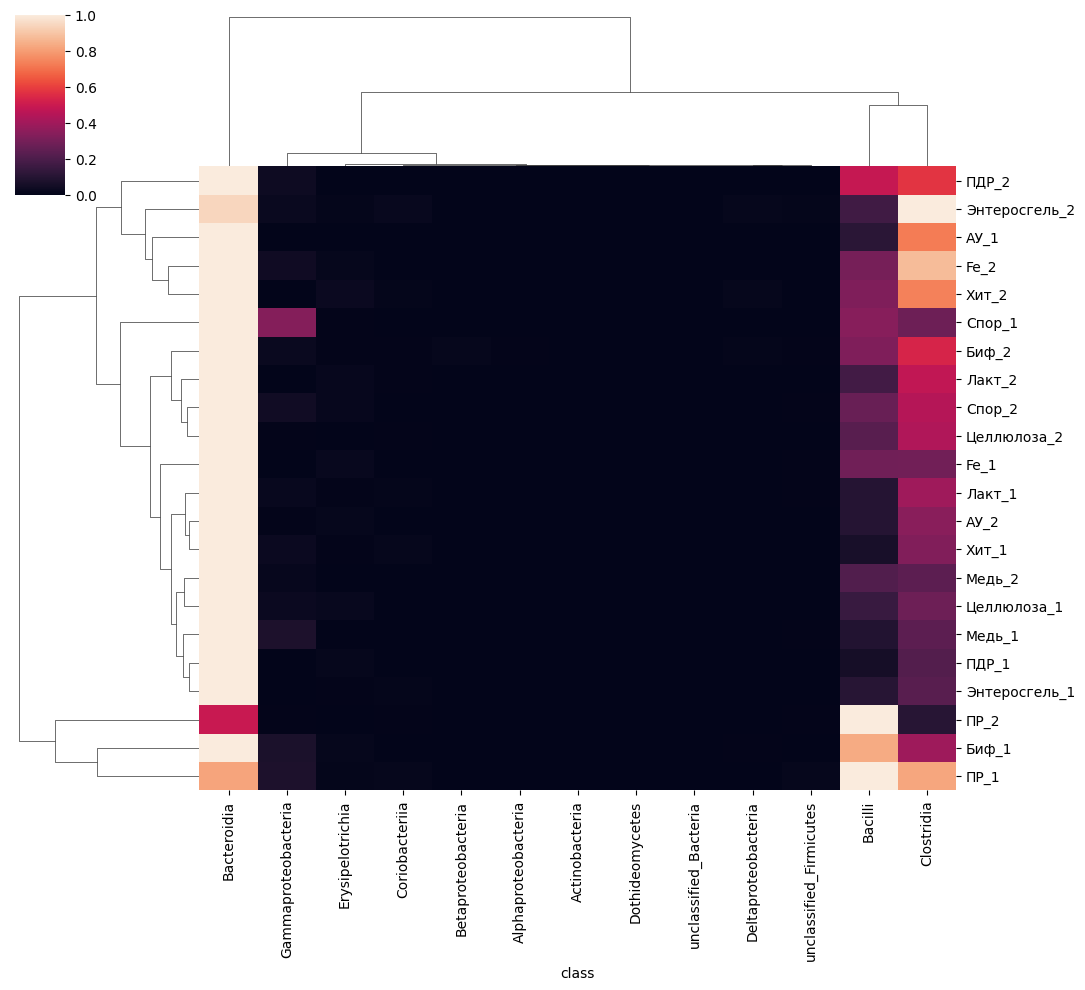

In [111]:
def plot_clustermap_class_fraq():
    scaler = MinMaxScaler()
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['class'], aggfunc='sum').reset_index()
    table.iloc[:,2:] = scaler.fit_transform(table.iloc[:,2:].T).T
    table['index'] = table['group'] + '_' + table['number'].astype(str)
    table.set_index(['index'])
    table_2 = table.drop(columns=['number', 'group', 'index'])
    g = sns.clustermap(table_2)
    dict_replace = table['index'].to_dict()
    idx_replace = [int(x.get_text()) for x in g.ax_heatmap.yaxis.get_ticklabels()]
    y_ticklabels = [dict_replace[x] for x in idx_replace]
    print(type(g.ax_heatmap.yaxis))
    g.ax_heatmap.yaxis.set_ticklabels(y_ticklabels, rotation=0)
plot_clustermap_class_fraq()